# Twitter Sentiment and Bitcoin Market Analysis

In [1]:
#import the necessary packages
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk 
import warnings 
import pandas as pd
from nltk.stem.porter import *
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

#This project is formated to be used with the Social Media Feed Manager from George Washington Univerisy

#Import the Twitter data
Tweets23_24 = pd.read_excel('10.23-10.24.xlsx')
Tweets24_25 = pd.read_excel('10.24-10.25.xlsx')
Tweets25_26 = pd.read_excel('10.25-10.26.xlsx')
Tweets26_27 = pd.read_excel('10.26-10.27.xlsx')
Tweets27_28 = pd.read_excel('10.27-10.28.xlsx')
Tweets28_29 = pd.read_excel('10.28-10.29.xlsx')
Tweets29_30 = pd.read_excel('10.29-10.30.xlsx')
Tweets30_31 = pd.read_excel('10.30-10.31.xlsx')
Tweets31_1 = pd.read_excel('10.31-11.1.xlsx')
Tweets1_2 = pd.read_excel('11.1-11.2.xlsx')
Bitcoin = pd.read_csv('bitcoindata.csv') 

In [2]:
def cleantweetremovepattern(df):
    """This function removes the user handle, URL, emoticons, and stop words."""
    df['tidy_tweet'] = df['text'].str.replace(r'@[\w]*', '')
    df['tidy_tweet'] = df['tidy_tweet'].str.replace(r'https?:\/\/.*[\r\n]*', '')
    df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
    df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) 
    return tokenizeandstem(df)

def tokenizeandstem(df):
    """This function tokenizes the tweets and stems them and then joins them back together."""
    tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split())
    stemmer = PorterStemmer()
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    df['tidy_tweet'] = tokenized_tweet
    return df

def dropcolsremovenoneng(df):
    """This function drops unnecessary columns and any tweets that are not in english."""
    df = df.loc[:,['created_at','lang','user_location','text', 'tidy_tweet']]
    df = df[df['lang'].str.contains('en', na = False)]
    return df

def Tweetsentiment(df):
    """This function performs the sentiment analysis and returns the polarity and subjectivity of the tweet."""
    df['sentiment'] = df['tidy_tweet'].apply(lambda tweet: TextBlob(tweet).sentiment)
    df.head()
    return df

In [3]:
#I got some of my ideas for the twitter data cleaning from Analytics Vidhya, I filled in the gaps and adjusted as necessary. 

In [4]:
Tweets23_24.head()

id                                          tweet_url  \
0  1054942925287616513  https://twitter.com/GaryMa_Zhu/status/10549429...   
1  1054942926424305664  https://twitter.com/Imimtiyaz2/status/10549429...   
2  1054942926894178305  https://twitter.com/edwardlye1/status/10549429...   
3  1054942927284166656  https://twitter.com/Quang43_C1/status/10549429...   
4  1054942927850418176  https://twitter.com/JohnEReilly2/status/105494...   

                       created_at          parsed_created_at user_screen_name  \
0  Wed Oct 24 03:49:27 +0000 2018  2018-10-24T03:49:27+00:00       GaryMa_Zhu   
1  Wed Oct 24 03:49:28 +0000 2018  2018-10-24T03:49:28+00:00       Imimtiyaz2   
2  Wed Oct 24 03:49:28 +0000 2018  2018-10-24T03:49:28+00:00       edwardlye1   
3  Wed Oct 24 03:49:28 +0000 2018  2018-10-24T03:49:28+00:00       Quang43_C1   
4  Wed Oct 24 03:49:28 +0000 2018  2018-10-24T03:49:28+00:00     JohnEReilly2   

                                                text tweet_type coordinates  \
0                             BFD = big fucking deal      quote         NaN   
1  RT @InnovaWhale: Blub blub! The INNOVA whale i...    retweet         NaN   
2  RT @CryptonityEx: We are happy to announce a p...    retweet         NaN   
3  Airdrop WIC Coin It's started now WIC Coin Ava...   original         NaN   
4  RT @j_exchanger: #Selfdrop ico is LIVE before ...    retweet         NaN   

         hashtags media      ...       user_favourites_count  \
0             NaN   NaN      ...                          32   
1  InnovaGiveaway   NaN      ...                         700   
2             NaN   NaN      ...                         369   
3             NaN   NaN      ...                          43   
4        Selfdrop   NaN      ...                           3   

   user_followers_count user_friends_count  user_listed_count  \
0                     5                 48                  0   
1                   118                582                  1   
2                   210                622                  0   
3                     7                 74                  0   
4                    14                  2                  0   

        user_location    user_name user_statuses_count  user_time_zone  \
0                 NaN      Gary.Ma                 236             NaN   
1                 NaN    Imimtiyaz                 773             NaN   
2                 NaN    edwardlye                 353             NaN   
3  Quảng Nam, Vietnam        Quang                  74             NaN   
4                 NaN  JohnEReilly                  65             NaN   

   user_urls  user_verified  
0        NaN          False  
1        NaN          False  
2        NaN          False  
3        NaN          False  
4        NaN          False  

[5 rows x 37 columns]

In [5]:
#Print the original tweets to see what they look like. 
print(Tweets23_24['text'][1])
print(Tweets23_24['text'][2])

RT @InnovaWhale: Blub blub! The INNOVA whale is having an #InnovaGiveaway! TWO random winners will receive 100 INN. Simply 1) follow me, 2)…
RT @CryptonityEx: We are happy to announce a partnership with https://t.co/pcCAXJ4clu Exchange, XNY will be listed with all trading pairs B…


In [6]:
#run clean tweet and tokenize functions
CleanTweets23_24 = cleantweetremovepattern(Tweets23_24)
CleanTweets23_24 = tokenizeandstem(CleanTweets23_24)

*****************************
*****
*****
*****
*****


In [7]:
#print the cleaned up tweets and then also the shape, so we know how many tweets we are working with.
print(CleanTweets23_24['tidy_tweet'][1])
print(CleanTweets23_24['tidy_tweet'][2])
print(CleanTweets23_24.shape)

blub blub innova whale have #innovagiveaway random winner will receiv simpli follow
happi announc partnership with
(171276, 38)


In [8]:
#Run dropcolsremoveeng function
CleanTweets23_24 = dropcolsremovenoneng(CleanTweets23_24)

In [9]:
#look at how many tweets we have now with only English tweets.
CleanTweets23_24.shape

(133522, 5)

In [10]:
#Perform Twitter sentiment analysis and examine the head of the data frame
CleanTweets23_24 = Tweetsentiment(CleanTweets23_24)
CleanTweets23_24.head()

created_at lang        user_location  \
0  Wed Oct 24 03:49:27 +0000 2018   en                  NaN   
1  Wed Oct 24 03:49:28 +0000 2018   en                  NaN   
2  Wed Oct 24 03:49:28 +0000 2018   en                  NaN   
3  Wed Oct 24 03:49:28 +0000 2018   en   Quảng Nam, Vietnam   
5  Wed Oct 24 03:49:28 +0000 2018   en  Kota Serang, Banten   

                                                text  \
0                             BFD = big fucking deal   
1  RT @InnovaWhale: Blub blub! The INNOVA whale i...   
2  RT @CryptonityEx: We are happy to announce a p...   
3  Airdrop WIC Coin It's started now WIC Coin Ava...   
5  💰Read the post to get BTC Bonus: 10-22 | List ...   

                                          tidy_tweet    sentiment  
0                                          fuck deal  (-0.4, 0.6)  
1  blub blub innova whale have #innovagiveaway ra...  (-0.5, 0.5)  
2                     happi announc partnership with   (0.0, 0.0)  
3  airdrop coin start coin avail coinmarketcap us...   (0.0, 0.0)  
5  read post bonu list cheater daili bitcoin bonu...   (0.0, 0.0)

In [11]:
#Split the Sentiment column into two columns, Polarity and Subjectivity. We only need Polarity. 

sentiment_series23_24 = CleanTweets23_24['sentiment'].tolist()

columns = ['polarity', 'subjectivity']

#Create new df with polarity and the index of cleantweets23_24
POLARITY23_24 = pd.DataFrame(sentiment_series23_24, columns=columns, index=CleanTweets23_24.index)

#removed all true Neutral tweets, I defined True Neutral as tweets equal to 0.00

POLARITY23_24 = POLARITY23_24[POLARITY23_24.polarity != 0.0]

#Classify the Tweets into Bullish (Positive, with polarity larger than 0.00) and Bearish (Negative, with polarity less than 0.00)

POLARITY23_24['Classification'] = np.where(POLARITY23_24['polarity']>=0, 'BULLISH', 'BEARISH')



In [12]:
#Perpare for the correlation, concatenate created_ad from cleantweet23_24 and polarity from polarity23_24 into one df.
Correlation23_24 = pd.concat([CleanTweets23_24['created_at'], POLARITY23_24['polarity']], axis=1)

#create a new column, Datetime, it is created_at but set as datetime. 
Correlation23_24['Datetime'] = pd.to_datetime(Correlation23_24['created_at'])

#Set index and flip the dataframe upside down so that the earliest date is first, then turn it into a series. 
Correlation23_24 = Correlation23_24.set_index('Datetime')

#Flip the data set upside down so the earliest date is on top

Correlation23_24 = Correlation23_24.iloc[::-1]

Series23_24 = pd.Series(Correlation23_24['polarity'])





In [13]:
#group the polarity by hour and find the mean, then send the series to a dataframe format. 
Series23_24GROUP = Series23_24.groupby(Series23_24.index.hour, sort=False).mean()

Series23_24GROUP = Series23_24GROUP.to_frame().reset_index()

Series23_24GROUP

Datetime  polarity
0          4  0.212102
1          5  0.210228
2          6  0.196632
3          7  0.205993
4          8  0.181688
5          9  0.175785
6         10  0.203546
7         11  0.166216
8         12  0.187624
9         13  0.164546
10        14  0.186177
11        15  0.209286
12        16  0.183223
13        17  0.213445
14        18  0.212141
15        19  0.204418
16        20  0.181293
17        21  0.183042
18        22  0.211445
19        23  0.202092
20         0  0.206006
21         1  0.188693
22         2  0.197664
23         3  0.211778

In [14]:
#Select the Bitcoin Data we need by range
Bitcoin = Bitcoin[0:288]
Bitcoin['Datetime'] = pd.to_datetime(Bitcoin['Date'])

Bitcoin23_24 = Bitcoin[(Bitcoin['Datetime'] > '2018-10-23 15:00') & (Bitcoin['Datetime'] <= '2018-10-24 15:00')]
Bitcoin23_24 = Bitcoin23_24.loc[:,['Close Price','Datetime']]
Bitcoin23_24


Close Price            Datetime
40      6436.83 2018-10-23 16:00:00
41      6427.46 2018-10-23 17:00:00
42      6433.18 2018-10-23 18:00:00
43      6446.85 2018-10-23 19:00:00
44      6433.65 2018-10-23 20:00:00
45      6434.80 2018-10-23 21:00:00
46      6431.91 2018-10-23 22:00:00
47      6434.06 2018-10-23 23:00:00
48      6441.63 2018-10-24 00:00:00
49      6440.87 2018-10-24 01:00:00
50      6443.18 2018-10-24 02:00:00
51      6455.67 2018-10-24 03:00:00
52      6495.10 2018-10-24 04:00:00
53      6480.92 2018-10-24 05:00:00
54      6480.44 2018-10-24 06:00:00
55      6477.40 2018-10-24 07:00:00
56      6471.47 2018-10-24 08:00:00
57      6472.52 2018-10-24 09:00:00
58      6476.72 2018-10-24 10:00:00
59      6468.01 2018-10-24 11:00:00
60      6474.25 2018-10-24 12:00:00
61      6476.31 2018-10-24 13:00:00
62      6478.53 2018-10-24 14:00:00
63      6459.53 2018-10-24 15:00:00

In [15]:
#Define functions to plot the correlatoins with the best fit lines, This is done using the seaborne package. 

def plotsentimentcorr(df1,df2):
    sns.regplot(df1['polarity'],df2['Close Price'])
    plt.title('Avg Polarity vs Close Price per Hour')
    plt.show()
    
def plotsentimentcorrLOG(df1,df2):
    sns.regplot(df1['polarity'],df2['logClose Price'])
    plt.title('Avg Polarity vs Close Price (Log) per Hour')
    plt.show()
    
def plotcountcorr(df1,df2):
    sns.regplot(df1['count'],df2['Close Price'])
    plt.title('Count vs Close Price per Hour')
    plt.show()
    
def plotcountcorrLOG(df1,df2):
    sns.regplot(df1['count'],df2['logClose Price'])
    plt.title('Avg Count vs Close Price (Log) per Hour')
    plt.show()

In [16]:
#Take the log of Bitcoin Close Price, this makes it easier to see the correlation or non correlation when plotting. 

Bitcoin23_24['logClose Price'] = np.log(Bitcoin23_24['Close Price'])

In [17]:
#Correlation of polarity and Bitcoin Log of Close Price
np.corrcoef(Series23_24GROUP['polarity'], Bitcoin23_24['logClose Price'])

array([[1.        , 0.23653031],
       [0.23653031, 1.        ]])

In [18]:
#Calculate the correlation between avg polarity by hour and Bitcoin close price for that hour
np.corrcoef(Series23_24GROUP['polarity'], Bitcoin23_24['Close Price'])

array([[1.        , 0.23638167],
       [0.23638167, 1.        ]])

In [19]:
#Both have a weak positive correlation

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


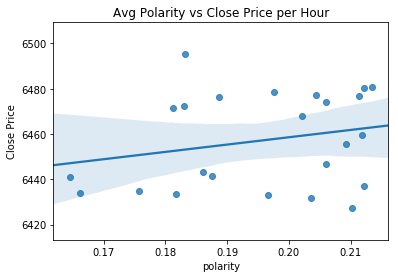

In [20]:
plotsentimentcorr(Series23_24GROUP, Bitcoin23_24)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


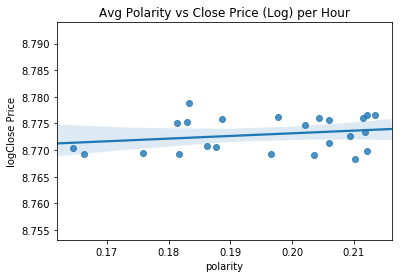

In [21]:
plotsentimentcorrLOG(Series23_24GROUP, Bitcoin23_24)


In [22]:
#We can see here that there is infact a weak positive correlation, it is best seen in the second plot when we take the log of Bitcoin Close Price

In [23]:
#Get the count of tweets grouped by hour

count23_24 = Series23_24.groupby(Series23_24.index.hour, sort = False).count()
count23_24 = count23_24.to_frame().reset_index()
count23_24 = count23_24.rename(columns={"polarity": "count"})
count23_24

Datetime  count
0          4   2205
1          5   2125
2          6   2247
3          7   2851
4          8   2841
5          9   2865
6         10   2505
7         11   2662
8         12   2544
9         13   2641
10        14   2674
11        15   2553
12        16   2592
13        17   2180
14        18   2157
15        19   2218
16        20   2015
17        21   1928
18        22   1730
19        23   1457
20         0   1577
21         1   1766
22         2   1871
23         3   1892

In [24]:
#Correlation of count per hour and Bitcoint Price
np.corrcoef(count23_24['count'], Bitcoin23_24['logClose Price'])


array([[ 1.        , -0.55598585],
       [-0.55598585,  1.        ]])

In [25]:
#Same correlation but with Log of Bitcoin Close Price
np.corrcoef(count23_24['count'], Bitcoin23_24['Close Price'])



array([[ 1.        , -0.55569981],
       [-0.55569981,  1.        ]])

In [26]:
#We can see and inverse fairly strong correlation, indicating the higher count of tweets the lower the bitcoin price

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


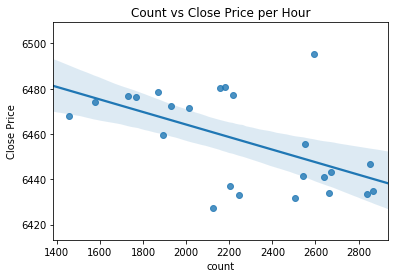

In [27]:
plotcountcorr(count23_24, Bitcoin23_24)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


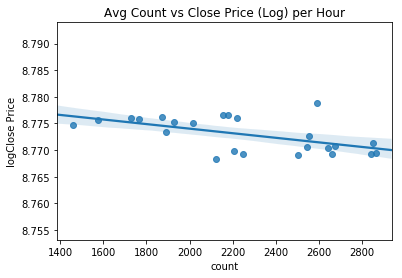

In [28]:
plotcountcorrLOG(count23_24, Bitcoin23_24)



In [29]:
#I will be following the exact same methodology I did for the previous day

Tweets24_25.head()

id                                          tweet_url  \
0  1055305298540482560  https://twitter.com/coinspectator/status/10553...   
1  1055305312956243968  https://twitter.com/MedioAlikinPay/status/1055...   
2  1055305316806475776  https://twitter.com/hugorodgers631/status/1055...   
3  1055305317557460992  https://twitter.com/BotLtc/status/105530531755...   
4  1055305323970469888  https://twitter.com/BastianVelandia/status/105...   

                       created_at          parsed_created_at user_screen_name  \
0  Thu Oct 25 03:49:24 +0000 2018  2018-10-25T03:49:24+00:00    coinspectator   
1  Thu Oct 25 03:49:27 +0000 2018  2018-10-25T03:49:27+00:00   MedioAlikinPay   
2  Thu Oct 25 03:49:28 +0000 2018  2018-10-25T03:49:28+00:00   hugorodgers631   
3  Thu Oct 25 03:49:28 +0000 2018  2018-10-25T03:49:28+00:00           BotLtc   
4  Thu Oct 25 03:49:30 +0000 2018  2018-10-25T03:49:30+00:00  BastianVelandia   

                                                text tweet_type coordinates  \
0  Ripple’s xRapid is being explored by another f...   original         NaN   
1  Crypto is my job and I spend many hours to ana...   original         NaN   
2  RT @j_exchanger: For Build strong global comun...    retweet         NaN   
3  RT @johnkim77: 💣💣💣💥🔥This is how the next #lite...    retweet         NaN   
4  #Tether recovering, I just don’t get it, who’s...   original         NaN   

                                            hashtags media      ...        \
0                                   ethereum btc ico   NaN      ...         
1                                                NaN   NaN      ...         
2                                                NaN   NaN      ...         
3  litecoin IgnitetheFireLTC PayWithLitecoin lite...   NaN      ...         
4                                      Tether crypto   NaN      ...         

  user_favourites_count  user_followers_count user_friends_count  \
0                  4208                  5792               1891   
1                  1849                  9971               3545   
2                     1                     6                  2   
3                  2898                  1626               2467   
4                  2827                   752                277   

   user_listed_count             user_location  \
0                164            United Kingdom   
1                 17  La Canada Flintridge, CA   
2                  0                       NaN   
3                  5                 Cryptopia   
4                310          The Crypto world   

                                        user_name user_statuses_count  \
0  Coin Spectator - Real-time cryptocurrency news              217487   
1                                    Medio Alikin                6507   
2                                   hugorodgers63                   6   
3                             LTC-Litecoin-Bote 🐥                8244   
4                              Sebastian Velandia                2484   

   user_time_zone  user_urls  user_verified  
0             NaN        NaN          False  
1             NaN        NaN          False  
2             NaN        NaN          False  
3             NaN        NaN          False  
4             NaN        NaN          False  

[5 rows x 37 columns]

In [30]:
print(Tweets24_25['text'][0])
print(Tweets24_25['text'][1])

Ripple’s xRapid is being explored by another financial institution – Catalyst Cor... #ethereum #btc #ico https://t.co/2Q9xhaeK9L https://t.co/yUF7sMV7hn
Crypto is my job and I spend many hours to analyze diverse ICO-projects. This project is on the top of my list. #AVL #AvailCom #AVLtoken #availcar #availrent #availauto #blockchain #blockchaintechnology #Bitcoin #Ethereum  https://t.co/MTQIF0YlLd @ComAvail


In [31]:
CLEANTweets24_25 = cleantweetremovepattern(Tweets24_25)


*****************************
*****
*****


In [32]:
CLEANTweets24_25 = tokenizeandstem(CLEANTweets24_25)

*****
*****


In [33]:
print(CLEANTweets24_25['tidy_tweet'][0])
print(CLEANTweets24_25['tidy_tweet'][1])

rippl xrapid be explor anoth financ institut catalyst #ethereum #btc #ico
crypto spend mani hour analyz diver project thi project list #avl #availcom #avltoken #availcar #availr #availauto #blockchain #blockchaintechnolog #bitcoin #ethereum


In [34]:
CLEANTweets24_25.shape

(152139, 38)

In [35]:
CLEANTweets24_25 = dropcolsremovenoneng(CLEANTweets24_25)

In [36]:
CLEANTweets24_25 = Tweetsentiment(CLEANTweets24_25)

In [37]:
CLEANTweets24_25.head()

created_at lang             user_location  \
0  Thu Oct 25 03:49:24 +0000 2018   en            United Kingdom   
1  Thu Oct 25 03:49:27 +0000 2018   en  La Canada Flintridge, CA   
2  Thu Oct 25 03:49:28 +0000 2018   en                       NaN   
3  Thu Oct 25 03:49:28 +0000 2018   en                 Cryptopia   
4  Thu Oct 25 03:49:30 +0000 2018   en          The Crypto world   

                                                text  \
0  Ripple’s xRapid is being explored by another f...   
1  Crypto is my job and I spend many hours to ana...   
2  RT @j_exchanger: For Build strong global comun...   
3  RT @johnkim77: 💣💣💣💥🔥This is how the next #lite...   
4  #Tether recovering, I just don’t get it, who’s...   

                                          tidy_tweet  \
0  rippl xrapid be explor anoth financ institut c...   
1  crypto spend mani hour analyz diver project th...   
2  build strong global comun market launch global...   
3  thi next #litecoin bull will look like #ignite...   
4  #tether recov just buy enter #crypto space thi...   

                                    sentiment  
0                                  (0.0, 0.0)  
1                                  (0.0, 0.0)  
2  (0.18333333333333332, 0.20833333333333331)  
3                                  (0.0, 0.0)  
4                                  (0.0, 0.0)

In [38]:
sentiment_series24_25 = CLEANTweets24_25['sentiment'].tolist()

columns = ['polarity', 'subjectivity']


POLARITY24_25 = pd.DataFrame(sentiment_series24_25, columns=columns, index=CLEANTweets24_25.index)


POLARITY24_25 = POLARITY24_25[POLARITY24_25.polarity != 0.0]


POLARITY24_25['Classification'] = np.where(POLARITY24_25['polarity']>=0, 'BULLISH', 'BEARISH')

POLARITY24_25.head()

polarity  subjectivity Classification
2   0.183333      0.208333        BULLISH
6   0.183333      0.208333        BULLISH
8   0.136364      0.454545        BULLISH
10  0.357143      0.571429        BULLISH
12  0.400000      0.800000        BULLISH

In [39]:
Correlation24_25 = pd.concat([CLEANTweets24_25['created_at'], POLARITY24_25['polarity']], axis=1)

Correlation24_25['Datetime'] = pd.to_datetime(Correlation24_25['created_at'])

Correlation24_25 = Correlation24_25.set_index('Datetime')

Correlation24_25 = Correlation24_25.iloc[::-1]

Series24_25 = pd.Series(Correlation24_25['polarity'])

Series24_25GROUP = Series24_25.groupby(Series24_25.index.hour, sort=False).mean()

Series24_25GROUP = Series24_25GROUP.to_frame()

Series24_25GROUP = Series24_25GROUP.reset_index()

Series24_25GROUP

Datetime  polarity
0          4  0.211725
1          5  0.212111
2          6  0.214413
3          7  0.205685
4          8  0.237417
5          9  0.247135
6         10  0.236767
7         11  0.226166
8         12  0.233651
9         13  0.258424
10        14  0.238044
11        15  0.238398
12        16  0.219115
13        17  0.222706
14        18  0.231537
15        19  0.215786
16        20  0.185585
17        21  0.226230
18        22  0.205629
19        23  0.206552
20         0  0.156710
21         1  0.176722
22         2  0.167669
23         3  0.187016

In [40]:
Bitcoin = Bitcoin[0:288]
Bitcoin['Datetime'] = pd.to_datetime(Bitcoin['Date'])

Bitcoin24_25 = Bitcoin[(Bitcoin['Datetime'] > '2018-10-24 15:00') & (Bitcoin['Datetime'] <= '2018-10-25 15:00')]
Bitcoin24_25 = Bitcoin24_25.loc[:,['Close Price','Datetime']]
Bitcoin24_25

Close Price            Datetime
64      6467.84 2018-10-24 16:00:00
65      6467.92 2018-10-24 17:00:00
66      6464.53 2018-10-24 18:00:00
67      6459.63 2018-10-24 19:00:00
68      6462.33 2018-10-24 20:00:00
69      6464.91 2018-10-24 21:00:00
70      6452.66 2018-10-24 22:00:00
71      6450.21 2018-10-24 23:00:00
72      6457.29 2018-10-25 00:00:00
73      6415.91 2018-10-25 01:00:00
74      6425.91 2018-10-25 02:00:00
75      6426.32 2018-10-25 03:00:00
76      6430.55 2018-10-25 04:00:00
77      6429.41 2018-10-25 05:00:00
78      6438.00 2018-10-25 06:00:00
79      6436.88 2018-10-25 07:00:00
80      6438.07 2018-10-25 08:00:00
81      6432.09 2018-10-25 09:00:00
82      6428.25 2018-10-25 10:00:00
83      6430.98 2018-10-25 11:00:00
84      6437.58 2018-10-25 12:00:00
85      6445.15 2018-10-25 13:00:00
86      6438.91 2018-10-25 14:00:00
87      6433.67 2018-10-25 15:00:00

In [41]:
Bitcoin24_25['logClose Price'] = np.log(Bitcoin24_25['Close Price'])

In [42]:
np.corrcoef(Series24_25GROUP['polarity'], Bitcoin24_25['logClose Price'])

array([[1.        , 0.01270341],
       [0.01270341, 1.        ]])

In [43]:
np.corrcoef(Series24_25GROUP['polarity'], Bitcoin24_25['Close Price'])

array([[1.        , 0.01323865],
       [0.01323865, 1.        ]])

In [44]:
#Here we can see a weak to almost no correlation

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


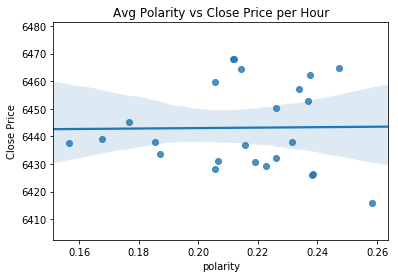

In [45]:
plotsentimentcorr(Series24_25GROUP, Bitcoin24_25)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


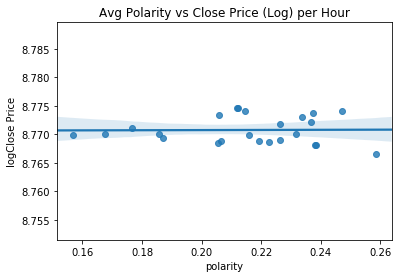

In [46]:
plotsentimentcorrLOG(Series24_25GROUP, Bitcoin24_25)



In [47]:
count24_25 = Series24_25.groupby(Series24_25.index.hour, sort=False).count()
count24_25 = count24_25.to_frame().reset_index()
count24_25 = count24_25.rename(columns={"polarity": "count"})
count24_25

Datetime  count
0          4   2124
1          5   2041
2          6   2078
3          7   2527
4          8   2736
5          9   2777
6         10   2515
7         11   2308
8         12   2425
9         13   2658
10        14   2402
11        15   2273
12        16   2344
13        17   2304
14        18   2216
15        19   2136
16        20   2022
17        21   1887
18        22   1877
19        23   1517
20         0   1691
21         1   1871
22         2   1698
23         3   1819

In [48]:
np.corrcoef(count24_25['count'], Bitcoin24_25['Close Price'])

array([[1.        , 0.26311733],
       [0.26311733, 1.        ]])

In [49]:
np.corrcoef(count24_25['count'], Bitcoin24_25['logClose Price'])

array([[1.       , 0.2627233],
       [0.2627233, 1.       ]])

In [50]:
#This is a weak positive correlation between Count and Close price

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


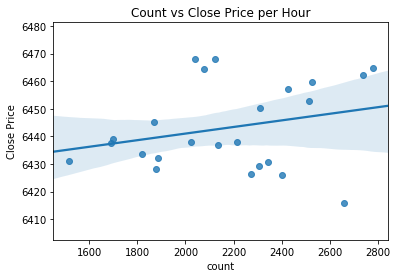

In [51]:
plotcountcorr(count24_25, Bitcoin24_25)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


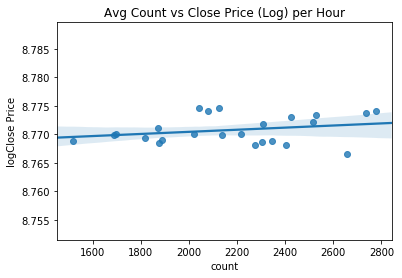

In [52]:
plotcountcorrLOG(count24_25, Bitcoin24_25)




In [53]:
#I will be following the same methodology as Tweets23_24 for the following day.

Tweets25_26.head()

id                                          tweet_url  \
0  1055667914953580545  https://twitter.com/btc_bollinger/status/10556...   
1  1055667918472531968  https://twitter.com/kasoutsukanooni/status/105...   
2  1055667918523060224  https://twitter.com/Bitcoin1Trader/status/1055...   
3  1055667919684689920  https://twitter.com/CryptoPioneers/status/1055...   
4  1055667921043755010  https://twitter.com/PLitecoin/status/105566792...   

                       created_at          parsed_created_at user_screen_name  \
0  Fri Oct 26 03:50:18 +0000 2018  2018-10-26T03:50:18+00:00    btc_bollinger   
1  Fri Oct 26 03:50:19 +0000 2018  2018-10-26T03:50:19+00:00  kasoutsukanooni   
2  Fri Oct 26 03:50:19 +0000 2018  2018-10-26T03:50:19+00:00   Bitcoin1Trader   
3  Fri Oct 26 03:50:20 +0000 2018  2018-10-26T03:50:20+00:00   CryptoPioneers   
4  Fri Oct 26 03:50:20 +0000 2018  2018-10-26T03:50:20+00:00        PLitecoin   

                                                text tweet_type coordinates  \
0  BTC界隈をフォローしてたはずなのに、いつのまにか為替・株に変わっていた。  まさにポルナレフ状態   original         NaN   
1  極秘情報はLINE@で！: 仮想通貨取引なら【DMM Bitcoin】「Cafe会話」30秒...   original         NaN   
2  House of Nakamoto Opens in Amsterdam https://t...   original         NaN   
3  RT @Bleeding_Crypto: $BTC If you think the Mar...    retweet         NaN   
4  RT @SatoshiLite: Bitcoin, Ethereum, and Liteco...    retweet         NaN   

           hashtags media      ...       user_favourites_count  \
0               NaN   NaN      ...                        5977   
1  仮想通貨 ビットコイン リップル   NaN      ...                           0   
2               NaN   NaN      ...                          45   
3               NaN   NaN      ...                         529   
4               NaN   NaN      ...                        3514   

   user_followers_count user_friends_count  user_listed_count  \
0                   389                193                  4   
1                  3297               3233                 10   
2                  3870               3162                 35   
3                   124                100                  0   
4                   100                183                  0   

     user_location                   user_name user_statuses_count  \
0          東京　さいたま                      ぼりんじゃー                3267   
1              NaN                      仮想通貨の鬼               26433   
2              NaN              Bitcoin Trader                1041   
3  California, USA              CryptoPioneers                3173   
4       Nutley, NJ  PayWithLitecoin [LTC][DGB]                 500   

   user_time_zone  user_urls  user_verified  
0             NaN        NaN          False  
1             NaN        NaN          False  
2             NaN        NaN          False  
3             NaN        NaN          False  
4             NaN        NaN          False  

[5 rows x 37 columns]

In [54]:
print(Tweets25_26['text'][3])
print(Tweets25_26['text'][4])

RT @Bleeding_Crypto: $BTC If you think the Market Markers will not shake out weak hands one more time right before we reverse this bull mar…
RT @SatoshiLite: Bitcoin, Ethereum, and Litecoin are the BELlweather cryptos. They are the only coins that are traded on every major crypto…


In [55]:
CLEANTweets25_26 = cleantweetremovepattern(Tweets25_26)

*****************************
*****
*****


In [56]:
CLEANTweets25_26 = tokenizeandstem(CLEANTweets25_26)

*****
*****


In [57]:
print(CLEANTweets25_26['tidy_tweet'][3])
print(CLEANTweets25_26['tidy_tweet'][4])
print(CLEANTweets25_26.shape)

think market marker will shake weak hand more time right befor rever thi bull
bitcoin ethereum litecoin bellweath crypto they onli coin that trade everi major crypto
(134791, 38)


In [58]:
CLEANTweets25_26 = dropcolsremovenoneng(CLEANTweets25_26)

In [59]:
CLEANTweets25_26 = Tweetsentiment(CLEANTweets25_26)
CLEANTweets25_26.head(20)

created_at lang          user_location  \
3   Fri Oct 26 03:50:20 +0000 2018   en        California, USA   
4   Fri Oct 26 03:50:20 +0000 2018   en             Nutley, NJ   
5   Fri Oct 26 03:50:21 +0000 2018   en                    NaN   
6   Fri Oct 26 03:50:22 +0000 2018   en                    NaN   
7   Fri Oct 26 03:50:23 +0000 2018   en                    NaN   
8   Fri Oct 26 03:50:24 +0000 2018   en                    NaN   
9   Fri Oct 26 03:50:24 +0000 2018   en                  Earth   
10  Fri Oct 26 03:50:25 +0000 2018   en                    NaN   
11  Fri Oct 26 03:50:26 +0000 2018   en                    NaN   
12  Fri Oct 26 03:50:26 +0000 2018   en                   Moon   
13  Fri Oct 26 03:50:27 +0000 2018   en                   Орёл   
14  Fri Oct 26 03:50:29 +0000 2018   en                    NaN   
16  Fri Oct 26 03:50:30 +0000 2018   en                    NaN   
17  Fri Oct 26 03:50:30 +0000 2018   en             Blockchain   
18  Fri Oct 26 03:50:33 +0000 2018   en                    NaN   
19  Fri Oct 26 03:50:34 +0000 2018   en           Crypto Land    
22  Fri Oct 26 03:50:37 +0000 2018   en                    NaN   
24  Fri Oct 26 03:50:39 +0000 2018   en                    NaN   
25  Fri Oct 26 03:50:39 +0000 2018   en        Jurektic  World   
26  Fri Oct 26 03:50:39 +0000 2018   en  Jawa Barat, Indonesia   

                                                 text  \
3   RT @Bleeding_Crypto: $BTC If you think the Mar...   
4   RT @SatoshiLite: Bitcoin, Ethereum, and Liteco...   
5   🔥🔥 Help Us Get Listed in @Cryptaldash Exchange...   
6   Airdrop WIC Coin It's started now WIC Coin Ava...   
7   .Earn bitcoin on a daily basis!  1. Follow @sl...   
8   @Victori59189086 @Becca58407448 @MyonieeO ‼️OM...   
9   RT @stunad620: #Litecoin’s fees will reduce 10...   
10  RT @SteveRichFXCorp: #Breaking #SteveRichFXCor...   
11  The King of the Coin is here, check this out #...   
12  Debunking Dr. Doom: Building a New Global Econ...   
13  RT @SCAVOTech: COUNT DOWN!! +1M USD RAISED 6 D...   
14  @ZolmaxNews ‼️OMG I have made 1.11 BTC just in...   
16  RT @CaptainAltcoin: A ghost roaming in the top...   
17  RT @CryptoEarnCoin: #bitcoin #crypto #airdrop ...   
18  RT @Stake: 💰 $2,000 Stake &amp; Primedice Give...   
19  RT @SGBarbour: Mining is the most anonymous me...   
22  RT @Luciano77192587: My favorite bounty system...   
24  @MyonieeO ‼️OMG I have made 1.11 BTC just in O...   
25  In a rising rate environment, we need more bit...   
26  LETS TRADING BTC.ETH altcoin NOW and GET 10 % ...   

                                           tidy_tweet  \
3   think market marker will shake weak hand more ...   
4   bitcoin ethereum litecoin bellweath crypto the...   
5                 help list exchang support coin vote   
6   airdrop coin start coin avail coinmarketcap us...   
7   earn bitcoin daili basi follow complet instruc...   
8              have made just with these channel free   
9   #litecoin fee will reduc after implement core ...   
10                 #break #steverichfxcorp #new alert   
11  king coin here check thi #coinolix #presal #bt...   
12  debunk doom build global economi glorifi sprea...   
13  count down rai day until end miss your last ch...   
14             have made just with these channel free   
16     ghost roam cryptocurr name verg captainaltcoin   
17  #bitcoin #crypto #airdrop kava airdrop kava co...   
18  stake primed giveaway lucki winner will receiv...   
19  mine most anonym mean get bitcoin worth small ...   
22                              favorit bounti system   
24             have made just with these channel free   
25  rise rate environ need more bitcoin shill nexu...   
26  let trade altcoin discount fee onli bitmex let...   

                                      sentiment  
3      (0.1369047619047619, 0.5535714285714285)  
4                                 (0.0625, 0.5)  
5                                    (0.0, 0.0)  
6                                    (0.0

In [60]:
sentiment_series25_26 = CLEANTweets25_26['sentiment'].tolist()

columns = ['polarity', 'subjectivity']


POLARITY25_26 = pd.DataFrame(sentiment_series25_26, columns=columns, index=CLEANTweets25_26.index)

POLARITY25_26 = POLARITY25_26[POLARITY25_26.polarity != 0.0]


POLARITY25_26['Classification'] = np.where(POLARITY25_26['polarity']>=0, 'BULLISH', 'BEARISH')

POLARITY25_26.head()

polarity  subjectivity Classification
3   0.136905      0.553571        BULLISH
4   0.062500      0.500000        BULLISH
8   0.400000      0.800000        BULLISH
10  0.136364      0.454545        BULLISH
13 -0.077778      0.177778        BEARISH

In [61]:
Correlation25_26 = pd.concat([CLEANTweets25_26['created_at'], POLARITY25_26['polarity']], axis=1)

Correlation25_26['Datetime'] = pd.to_datetime(Correlation25_26['created_at'])


Correlation25_26 = Correlation25_26.set_index('Datetime')

Correlation25_26 = Correlation25_26.iloc[::-1]

Series25_26 = pd.Series(Correlation25_26['polarity'])

Series25_26GROUP = Series25_26.groupby(Series25_26.index.hour, sort=False).mean()

#Series25_26GROUP = Series25_26GROUP.to_frame()

#Series25_26GROUP = Series25_26.reset_index()

Series25_26GROUP = Series25_26GROUP.to_frame()

Series25_26GROUP



polarity
Datetime          
4         0.173086
5         0.185440
6         0.170717
7         0.177726
8         0.189930
9         0.169433
10        0.179818
11        0.157126
12        0.188964
13        0.174769
14        0.183863
15        0.192468
16        0.172563
17        0.171311
18        0.186513
19        0.193565
20        0.214622
21        0.199430
22        0.213704
23        0.225956
0         0.186137
1         0.184241
2         0.190244
3         0.207304

In [62]:
Bitcoin = Bitcoin[0:288]
Bitcoin['Datetime'] = pd.to_datetime(Bitcoin['Date'])

Bitcoin25_26 = Bitcoin[(Bitcoin['Datetime'] > '2018-10-25 15:00') & (Bitcoin['Datetime'] <= '2018-10-26 15:00')]
Bitcoin25_26 = Bitcoin25_26.loc[:,['Close Price','Datetime']]
Bitcoin25_26

Close Price            Datetime
88       6436.36 2018-10-25 16:00:00
89       6434.39 2018-10-25 17:00:00
90       6450.21 2018-10-25 18:00:00
91       6442.68 2018-10-25 19:00:00
92       6436.51 2018-10-25 20:00:00
93       6434.61 2018-10-25 21:00:00
94       6445.23 2018-10-25 22:00:00
95       6428.96 2018-10-25 23:00:00
96       6432.04 2018-10-26 00:00:00
97       6426.67 2018-10-26 01:00:00
98       6425.99 2018-10-26 02:00:00
99       6424.88 2018-10-26 03:00:00
100      6421.06 2018-10-26 04:00:00
101      6427.38 2018-10-26 05:00:00
102      6427.58 2018-10-26 06:00:00
103      6421.05 2018-10-26 07:00:00
104      6467.15 2018-10-26 08:00:00
105      6451.72 2018-10-26 09:00:00
106      6450.63 2018-10-26 10:00:00
107      6449.43 2018-10-26 11:00:00
108      6438.44 2018-10-26 12:00:00
109      6426.26 2018-10-26 13:00:00
110      6433.06 2018-10-26 14:00:00
111      6431.37 2018-10-26 15:00:00

In [63]:
Bitcoin25_26['logClose Price'] = np.log(Bitcoin25_26['Close Price'])

In [64]:
np.corrcoef(Series25_26GROUP['polarity'], Bitcoin25_26['Close Price'])

array([[1.        , 0.48764334],
       [0.48764334, 1.        ]])

In [65]:
np.corrcoef(Series25_26GROUP['polarity'], Bitcoin25_26['logClose Price'])

array([[1.        , 0.48743003],
       [0.48743003, 1.        ]])

In [66]:
#There is a Moderate positive correlation

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


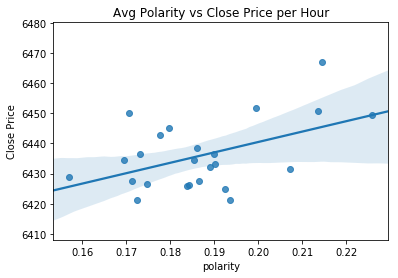

In [67]:
plotsentimentcorr(Series25_26GROUP, Bitcoin25_26)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


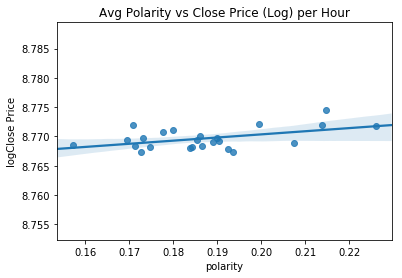

In [68]:
plotsentimentcorrLOG(Series25_26GROUP, Bitcoin25_26)


In [69]:
count25_26 = Series25_26.groupby(Series25_26.index.hour, sort=False).count()
count25_26 = count25_26.to_frame().reset_index()
count25_26 = count25_26.rename(columns={"polarity": "count"})
count25_26

Datetime  count
0          4   1729
1          5   1880
2          6   1920
3          7   2312
4          8   2038
5          9   2071
6         10   1350
7         11   2090
8         12   1506
9         13   2767
10        14   2526
11        15   2272
12        16   2523
13        17   2295
14        18   2213
15        19   1951
16        20   1853
17        21   1654
18        22   1650
19        23   1448
20         0   1393
21         1   1571
22         2   1500
23         3   1474

In [70]:
np.corrcoef(count25_26['count'], Bitcoin25_26['Close Price'])

array([[ 1.        , -0.43850067],
       [-0.43850067,  1.        ]])

In [71]:
np.corrcoef(count25_26['count'], Bitcoin25_26['logClose Price'])

array([[ 1.        , -0.43886814],
       [-0.43886814,  1.        ]])

In [72]:
#There is a moderate negative correlation between count and close price 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


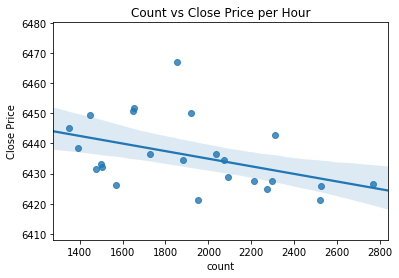

In [73]:
plotcountcorr(count25_26, Bitcoin25_26)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


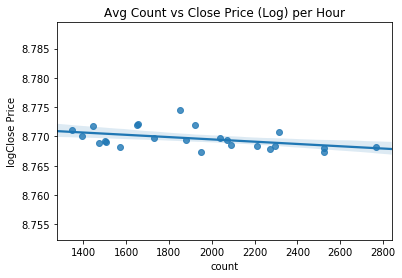

In [74]:
plotcountcorrLOG(count25_26, Bitcoin25_26)


In [75]:
#I will be following the same methodology as Tweets23_24 for the following day.

Tweets26_27.head()

id                                          tweet_url  \
0  1056030305482461184  https://twitter.com/andri000me_40/status/10560...   
1  1056030316450770944  https://twitter.com/Maria38689213/status/10560...   
2  1056030327657951232  https://twitter.com/BCHmeetups/status/10560303...   
3  1056030334058463232  https://twitter.com/Lori16063607/status/105603...   
4  1056030334985297920  https://twitter.com/HildaRuby2/status/10560303...   

                       created_at          parsed_created_at user_screen_name  \
0  Sat Oct 27 03:50:19 +0000 2018  2018-10-27T03:50:19+00:00    andri000me_40   
1  Sat Oct 27 03:50:22 +0000 2018  2018-10-27T03:50:22+00:00    Maria38689213   
2  Sat Oct 27 03:50:24 +0000 2018  2018-10-27T03:50:24+00:00       BCHmeetups   
3  Sat Oct 27 03:50:26 +0000 2018  2018-10-27T03:50:26+00:00     Lori16063607   
4  Sat Oct 27 03:50:26 +0000 2018  2018-10-27T03:50:26+00:00       HildaRuby2   

                                                text tweet_type coordinates  \
0        27/10/2018 11:48:53 https://t.co/Xt0Mdb1JMX   original         NaN   
1  @jasonclarktwit ‼️OMG I have made 1.11 BTC jus...      reply         NaN   
2  Join the #BitcoinCash meetup in San Francisco!...      quote         NaN   
3  @MyonieeO ‼️OMG I have made 1.11 BTC just in O...      reply         NaN   
4  Airdrop WIC Coin It's started now WIC Coin Ava...   original         NaN   

          hashtags media      ...       user_favourites_count  \
0              NaN   NaN      ...                         195   
1              NaN   NaN      ...                           0   
2  BitcoinCash BCH   NaN      ...                        2078   
3              NaN   NaN      ...                           0   
4              NaN   NaN      ...                          72   

   user_followers_count user_friends_count  user_listed_count  \
0                    20               2250                  0   
1                     9                  0                  0   
2                  1865                343                 16   
3                    16                  0                  0   
4                    13                154                  0   

                user_location                   user_name user_statuses_count  \
0                   Indonesia                   Andri Ete             1135127   
1  Boston, Massachusetts, USA                       Maria                  56   
2                      Global  Bitcoin Cash (BCH) Meetups                 446   
3                         NaN                        Lori                  56   
4                         NaN                  Hilda Ruby                 122   

   user_time_zone  user_urls  user_verified  
0             NaN        NaN          False  
1             NaN        NaN          False  
2             NaN        NaN          False  
3             NaN        NaN          False  
4             NaN        NaN          False  

[5 rows x 37 columns]

In [76]:
print(Tweets26_27['text'][0])
print(Tweets26_27['text'][1])
print(Tweets26_27.shape)

27/10/2018 11:48:53 https://t.co/Xt0Mdb1JMX
@jasonclarktwit ‼️OMG I have made 1.11 BTC just in ONE day with these channel and its free  😮  https://t.co/8cMvArOCYz  $RLC $KNC ⭕ 522753369
(139802, 37)


In [77]:
CLEANTweets26_27 = cleantweetremovepattern(Tweets26_27)

*****************************
*****
*****


In [78]:
CLEANTweets26_27 = tokenizeandstem(CLEANTweets26_27)

*****
*****


In [79]:
print(CLEANTweets26_27['tidy_tweet'][1])

have made just with these channel free


In [80]:
CLEANTweets26_27 = dropcolsremovenoneng(CLEANTweets26_27)

In [81]:
CLEANTweets26_27 = Tweetsentiment(CLEANTweets26_27)
CLEANTweets26_27.head()

created_at lang               user_location  \
1  Sat Oct 27 03:50:22 +0000 2018   en  Boston, Massachusetts, USA   
2  Sat Oct 27 03:50:24 +0000 2018   en                      Global   
3  Sat Oct 27 03:50:26 +0000 2018   en                         NaN   
4  Sat Oct 27 03:50:26 +0000 2018   en                         NaN   
7  Sat Oct 27 03:50:28 +0000 2018   en                   Indonesia   

                                                text  \
1  @jasonclarktwit ‼️OMG I have made 1.11 BTC jus...   
2  Join the #BitcoinCash meetup in San Francisco!...   
3  @MyonieeO ‼️OMG I have made 1.11 BTC just in O...   
4  Airdrop WIC Coin It's started now WIC Coin Ava...   
7  RT @swachhcoin: Indian #cryptocurrency Swachhc...   

                                          tidy_tweet    sentiment  
1             have made just with these channel free   (0.4, 0.8)  
2  join #bitcoincash meetup francisco great team ...  (0.8, 0.75)  
3             have made just with these channel free   (0.4, 0.8)  
4  airdrop coin start coin avail coinmarketcap us...   (0.0, 0.0)  
7  indian #cryptocurr swachhcoin launch boost #sw...   (0.0, 0.0)

In [82]:
sentiment_series26_27 = CLEANTweets26_27['sentiment'].tolist()

columns = ['polarity', 'subjectivity']


POLARITY26_27  = pd.DataFrame(sentiment_series26_27 , columns=columns, index=CLEANTweets26_27.index)

POLARITY26_27 = POLARITY26_27[POLARITY26_27.polarity != 0.0]


POLARITY26_27 ['Classification'] = np.where(POLARITY26_27 ['polarity']>=0, 'BULLISH', 'BEARISH')

POLARITY26_27 .head()

polarity  subjectivity Classification
1       0.40         0.800        BULLISH
2       0.80         0.750        BULLISH
3       0.40         0.800        BULLISH
10      0.55         0.625        BULLISH
13      0.50         0.900        BULLISH

In [83]:
Correlation26_27 = pd.concat([CLEANTweets26_27['created_at'], POLARITY26_27['polarity']], axis=1)

Correlation26_27['Datetime'] = pd.to_datetime(Correlation26_27['created_at'])

Correlation26_27 = Correlation26_27.set_index('Datetime')

Correlation26_27 = Correlation26_27.iloc[::-1]

Series26_27 = pd.Series(Correlation26_27['polarity'])

Series26_27GROUP = Series26_27.groupby(Series26_27.index.hour, sort=False).mean()

Series26_27GROUP = Series26_27GROUP.to_frame().reset_index()

Series26_27GROUP

Datetime  polarity
0          4  0.206056
1          5  0.205294
2          6  0.202460
3          7  0.218395
4          8  0.195759
5          9  0.192609
6         10  0.197817
7         11  0.193595
8         12  0.211906
9         13  0.203923
10        14  0.191151
11        15  0.198596
12        16  0.188507
13        17  0.205266
14        18  0.219447
15        19  0.213892
16        20  0.187962
17        21  0.204601
18        22  0.163270
19        23  0.175190
20         0  0.164504
21         1  0.205711
22         2  0.223163
23         3  0.202239

In [84]:
Bitcoin26_27 = Bitcoin[(Bitcoin['Datetime'] > '2018-10-26 15:00') & (Bitcoin['Datetime'] <= '2018-10-27 15:00')]
Bitcoin26_27 = Bitcoin26_27.loc[:,['Close Price','Datetime']]
Bitcoin26_27

Close Price            Datetime
112      6441.10 2018-10-26 16:00:00
113      6440.60 2018-10-26 17:00:00
114      6434.69 2018-10-26 18:00:00
115      6434.57 2018-10-26 19:00:00
116      6437.25 2018-10-26 20:00:00
117      6432.22 2018-10-26 21:00:00
118      6437.28 2018-10-26 22:00:00
119      6436.85 2018-10-26 23:00:00
120      6440.87 2018-10-27 00:00:00
121      6444.13 2018-10-27 01:00:00
122      6443.01 2018-10-27 02:00:00
123      6448.90 2018-10-27 03:00:00
124      6448.35 2018-10-27 04:00:00
125      6445.56 2018-10-27 05:00:00
126      6448.05 2018-10-27 06:00:00
127      6446.13 2018-10-27 07:00:00
128      6439.61 2018-10-27 08:00:00
129      6442.89 2018-10-27 09:00:00
130      6434.45 2018-10-27 10:00:00
131      6434.46 2018-10-27 11:00:00
132      6435.03 2018-10-27 12:00:00
133      6426.20 2018-10-27 13:00:00
134      6422.75 2018-10-27 14:00:00
135      6420.19 2018-10-27 15:00:00

In [85]:
Bitcoin26_27['logClose Price'] = np.log(Bitcoin26_27['Close Price'])

In [86]:
np.corrcoef(Series26_27GROUP['polarity'], Bitcoin26_27['Close Price'])

array([[1.        , 0.04219266],
       [0.04219266, 1.        ]])

In [87]:
np.corrcoef(Series26_27GROUP['polarity'], Bitcoin26_27['logClose Price'])

array([[1.        , 0.04190704],
       [0.04190704, 1.        ]])

In [88]:
#This is a weak to non positive correlation

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


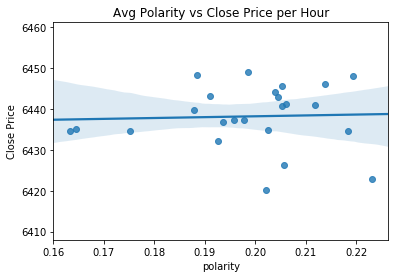

In [89]:
plotsentimentcorr(Series26_27GROUP, Bitcoin26_27)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


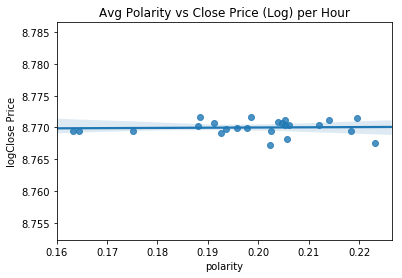

In [90]:
plotsentimentcorrLOG(Series26_27GROUP, Bitcoin26_27)


In [91]:
count26_27 = Series26_27.groupby(Series26_27.index.hour, sort=False).count()
count26_27 = count26_27.to_frame().reset_index()
count26_27 = count26_27.rename(columns={"polarity": "count"})
count26_27

Datetime  count
0          4   1576
1          5   1606
2          6   1714
3          7   2310
4          8   2078
5          9   2164
6         10   1994
7         11   2090
8         12   2182
9         13   2370
10        14   2494
11        15   2599
12        16   2732
13        17   2323
14        18   2295
15        19   2123
16        20   2082
17        21   1796
18        22   1748
19        23   1483
20         0   1367
21         1   1431
22         2   1452
23         3   1490

In [92]:
np.corrcoef(count26_27['count'], Bitcoin26_27['Close Price'])

array([[1.        , 0.70907336],
       [0.70907336, 1.        ]])

In [93]:
np.corrcoef(count26_27['count'], Bitcoin26_27['logClose Price'])

array([[1.        , 0.70894792],
       [0.70894792, 1.        ]])

In [94]:
#This is a very strong positive correlation

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


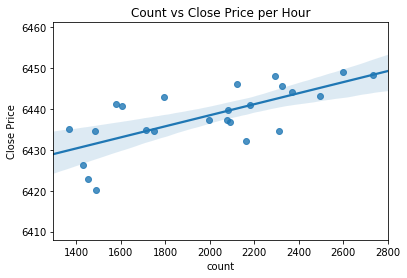

In [95]:
plotcountcorr(count26_27, Bitcoin26_27)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


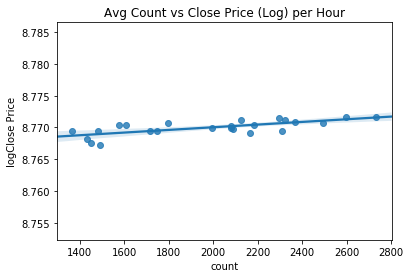

In [96]:
plotcountcorrLOG(count26_27, Bitcoin26_27)

In [97]:
#I will be following the same methodology as Tweets23_24 for the following day.

Tweets27_28.head()

id                                          tweet_url  \
0  1056392690978471936  https://twitter.com/bez1128/status/10563926909...   
1  1056392691813138434  https://twitter.com/k7FXuKGSklZgfBJ/status/105...   
2  1056392703854997505  https://twitter.com/Cryptonaut_01/status/10563...   
3  1056392707004760065  https://twitter.com/Arhamfikri/status/10563927...   
4  1056392708233682944  https://twitter.com/ManojMayogi/status/1056392...   

                       created_at          parsed_created_at user_screen_name  \
0  Sun Oct 28 03:50:19 +0000 2018  2018-10-28T03:50:19+00:00          bez1128   
1  Sun Oct 28 03:50:19 +0000 2018  2018-10-28T03:50:19+00:00  k7FXuKGSklZgfBJ   
2  Sun Oct 28 03:50:22 +0000 2018  2018-10-28T03:50:22+00:00    Cryptonaut_01   
3  Sun Oct 28 03:50:22 +0000 2018  2018-10-28T03:50:22+00:00       Arhamfikri   
4  Sun Oct 28 03:50:23 +0000 2018  2018-10-28T03:50:23+00:00      ManojMayogi   

                                                text tweet_type coordinates  \
0  RT @WLFOFMYST: ✍️ The lack of volume being tra...    retweet         NaN   
1  #Bitcoin #News #mysheep_info https://t.co/D0Nw...   original         NaN   
2  Rektbot first time since I know it, inactive f...      quote         NaN   
3  RT @Platioecosystem: For the cryptocurrency wo...    retweet         NaN   
4  RT @reach2ratan: Top 3 Ways #Blockchain Techno...    retweet         NaN   

                    hashtags media      ...       user_favourites_count  \
0             Bitcoin crypto   NaN      ...                        3099   
1  Bitcoin News mysheep_info   NaN      ...                          66   
2                    bitcoin   NaN      ...                        2977   
3                        NaN   NaN      ...                       11375   
4         Blockchain Fintech   NaN      ...                       38213   

   user_followers_count user_friends_count  user_listed_count  \
0                   231                460                  2   
1                     7                 58                  0   
2                   347                230                  4   
3                  4023               2811                  3   
4                  1773               1357                 22   

      user_location            user_name user_statuses_count  user_time_zone  \
0       Mexico City       Brian Enriquez                6052             NaN   
1               NaN                Диана                 157             NaN   
2  Wien, Österreich     Muten($BTC)Roshi                4334             NaN   
3         Indonesia                Arham               17966             NaN   
4   Dehradun, India  Manoj Mayogi Mishra               37469             NaN   

   user_urls  user_verified  
0        NaN          False  
1        NaN          False  
2        NaN          False  
3        NaN          False  
4        NaN          False  

[5 rows x 37 columns]

In [98]:
print(Tweets27_28['text'][0])
print(Tweets27_28['text'][1])

RT @WLFOFMYST: ✍️ The lack of volume being traded in #Bitcoin and #crypto atm is borderline bizarre - and obscenely non-existent. I expect…
#Bitcoin #News #mysheep_info https://t.co/D0NwJxZETq


In [99]:
CLEANTweets27_28 = cleantweetremovepattern(Tweets27_28)

*****************************
*****
*****


In [100]:
CLEANTweets27_28 = tokenizeandstem(CLEANTweets27_28)

*****
*****


In [101]:
print(CLEANTweets27_28['tidy_tweet'][0])
print(CLEANTweets27_28['tidy_tweet'][1])
print(CLEANTweets27_28.shape)

lack volum be trade #bitcoin #crypto borderlin bizarr obscen exist expect
#bitcoin #new #mysheep info
(124833, 38)


In [102]:
CLEANTweets27_28 = dropcolsremovenoneng(CLEANTweets27_28)


In [103]:
CLEANTweets27_28 = Tweetsentiment(CLEANTweets27_28)
CLEANTweets27_28.head()

created_at lang     user_location  \
0  Sun Oct 28 03:50:19 +0000 2018   en       Mexico City   
2  Sun Oct 28 03:50:22 +0000 2018   en  Wien, Österreich   
3  Sun Oct 28 03:50:22 +0000 2018   en         Indonesia   
4  Sun Oct 28 03:50:23 +0000 2018   en   Dehradun, India   
5  Sun Oct 28 03:50:25 +0000 2018   en            Skynet   

                                                text  \
0  RT @WLFOFMYST: ✍️ The lack of volume being tra...   
2  Rektbot first time since I know it, inactive f...   
3  RT @Platioecosystem: For the cryptocurrency wo...   
4  RT @reach2ratan: Top 3 Ways #Blockchain Techno...   
5  Will There Be a Bitcoin Cash (BCH) Hard Fork i...   

                                          tidy_tweet  \
0  lack volum be trade #bitcoin #crypto borderlin...   
2  rektbot first time sinc know inact rekt trade ...   
3  cryptocurr world have chanc success growth nee...   
4  way #blockchain technolog improv transform ind...   
5  will there bitcoin cash hard fork novemb #bitc...   

                                   sentiment  
0                                 (0.0, 0.0)  
2                 (0.25, 0.3333333333333333)  
3                                 (0.3, 0.0)  
4                                 (0.0, 0.0)  
5  (-0.2916666666666667, 0.5416666666666666)

In [104]:
sentiment_series27_28 = CLEANTweets27_28['sentiment'].tolist()

columns = ['polarity', 'subjectivity']


POLARITY27_28  = pd.DataFrame(sentiment_series27_28 , columns=columns, index=CLEANTweets27_28.index)

POLARITY27_28 = POLARITY27_28[POLARITY27_28.polarity != 0.0]


POLARITY27_28 ['Classification'] = np.where(POLARITY27_28 ['polarity']>=0, 'BULLISH', 'BEARISH')

POLARITY27_28 .head()

polarity  subjectivity Classification
2   0.250000      0.333333        BULLISH
3   0.300000      0.000000        BULLISH
5  -0.291667      0.541667        BEARISH
6  -0.500000      1.000000        BEARISH
11  0.262500      0.670833        BULLISH

In [105]:
Correlation27_28 = pd.concat([CLEANTweets27_28['created_at'], POLARITY27_28['polarity']], axis=1)

Correlation27_28['Datetime'] = pd.to_datetime(Correlation27_28['created_at'])

Correlation27_28 = Correlation27_28.set_index('Datetime')

Correlation27_28 = Correlation27_28.iloc[::-1]

Series27_28 = pd.Series(Correlation27_28['polarity'])

Series27_28GROUP = Series27_28.groupby(Series27_28.index.hour, sort=False).mean()

Series27_28GROUP = Series27_28GROUP.to_frame().reset_index()

Series27_28GROUP

Datetime  polarity
0          4  0.200579
1          5  0.199541
2          6  0.194806
3          7  0.198725
4          8  0.188832
5          9  0.215085
6         10  0.222031
7         11  0.218108
8         12  0.237230
9         13  0.199632
10        14  0.233307
11        15  0.214654
12        16  0.215226
13        17  0.187080
14        18  0.225214
15        19  0.193744
16        20  0.217109
17        21  0.207014
18        22  0.211287
19        23  0.236130
20         0  0.205303
21         1  0.226297
22         2  0.203274
23         3  0.218241

In [106]:
Bitcoin27_28 = Bitcoin[(Bitcoin['Datetime'] > '2018-10-27 15:00') & (Bitcoin['Datetime'] <= '2018-10-28 15:00')]
Bitcoin27_28 = Bitcoin27_28.loc[:,['Close Price','Datetime']]
Bitcoin27_28

Close Price            Datetime
136      6424.12 2018-10-27 16:00:00
137      6426.57 2018-10-27 17:00:00
138      6419.57 2018-10-27 18:00:00
139      6423.76 2018-10-27 19:00:00
140      6424.32 2018-10-27 20:00:00
141      6432.69 2018-10-27 21:00:00
142      6433.57 2018-10-27 22:00:00
143      6431.11 2018-10-27 23:00:00
144      6427.20 2018-10-28 00:00:00
145      6427.39 2018-10-28 01:00:00
146      6428.64 2018-10-28 02:00:00
147      6428.29 2018-10-28 03:00:00
148      6431.22 2018-10-28 04:00:00
149      6435.06 2018-10-28 05:00:00
150      6427.50 2018-10-28 06:00:00
151      6426.28 2018-10-28 07:00:00
152      6424.36 2018-10-28 08:00:00
153      6424.21 2018-10-28 09:00:00
154      6423.07 2018-10-28 10:00:00
155      6422.12 2018-10-28 11:00:00
156      6425.07 2018-10-28 12:00:00
157      6430.58 2018-10-28 13:00:00
158      6428.39 2018-10-28 14:00:00
159      6420.96 2018-10-28 15:00:00

In [107]:
Bitcoin27_28['logClose Price'] = np.log(Bitcoin27_28['Close Price'])

In [108]:
np.corrcoef(Series27_28GROUP['polarity'], Bitcoin27_28['Close Price'])

array([[1.        , 0.11148357],
       [0.11148357, 1.        ]])

In [109]:
np.corrcoef(Series27_28GROUP['polarity'], Bitcoin27_28['logClose Price'])

array([[1.        , 0.11154799],
       [0.11154799, 1.        ]])

In [110]:
#This is a positive extremely weak correlation

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


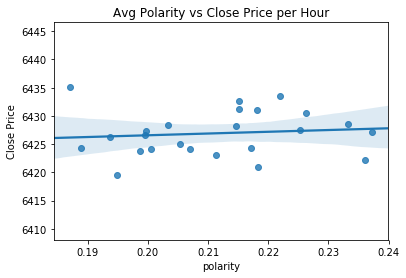

In [111]:
plotsentimentcorr(Series27_28GROUP, Bitcoin27_28)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


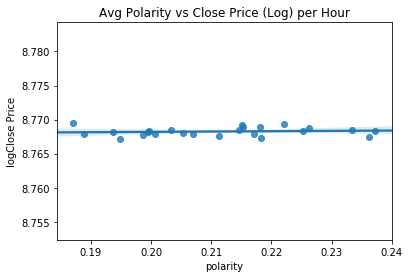

In [112]:
plotsentimentcorrLOG(Series27_28GROUP, Bitcoin27_28)

In [113]:

count27_28 = Series27_28.groupby(Series27_28.index.hour, sort = False).count()
count27_28 = count27_28.to_frame().reset_index()
count27_28 = count27_28.rename(columns={"polarity": "count"})
count27_28

Datetime  count
0          4   1418
1          5   1451
2          6   1550
3          7   1738
4          8   1800
5          9   1780
6         10   1719
7         11   1555
8         12   1704
9         13   1873
10        14   2282
11        15   2193
12        16   2284
13        17   2267
14        18   1993
15        19   1885
16        20   1674
17        21   1568
18        22   1403
19        23   1452
20         0   1295
21         1   1313
22         2   1344
23         3   1274

In [114]:
np.corrcoef(count27_28['count'], Bitcoin27_28['Close Price'])

array([[1.      , 0.491555],
       [0.491555, 1.      ]])

In [115]:
np.corrcoef(count27_28['count'], Bitcoin27_28['logClose Price'])

array([[1.        , 0.49156754],
       [0.49156754, 1.        ]])

In [116]:
#This is a moderate positive correlation between the two variables 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


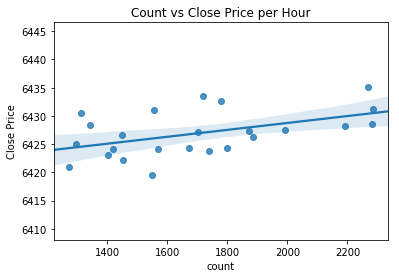

In [117]:
plotcountcorr(count27_28, Bitcoin27_28)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


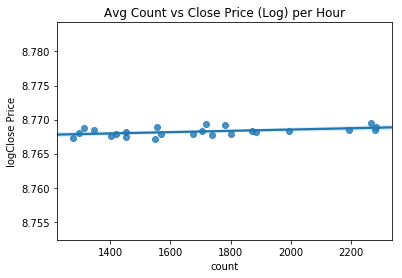

In [118]:
plotcountcorrLOG(count27_28, Bitcoin27_28)

In [119]:
#I will be following the same methodology as Tweets23_24 for the following day.
Tweets28_29.head()

id                                          tweet_url  \
0  1056755078344757248  https://twitter.com/yoshiboon23/status/1056755...   
1  1056755081239019521  https://twitter.com/911Itz_hizzle/status/10567...   
2  1056755082086146050  https://twitter.com/top_of_cat/status/10567550...   
3  1056755084678385664  https://twitter.com/iJ53bYDfpxkVCWG/status/105...   
4  1056755090290364416  https://twitter.com/AHzpdfxCQFz4889/status/105...   

                       created_at          parsed_created_at user_screen_name  \
0  Mon Oct 29 03:50:18 +0000 2018  2018-10-29T03:50:18+00:00      yoshiboon23   
1  Mon Oct 29 03:50:19 +0000 2018  2018-10-29T03:50:19+00:00    911Itz_hizzle   
2  Mon Oct 29 03:50:19 +0000 2018  2018-10-29T03:50:19+00:00       top_of_cat   
3  Mon Oct 29 03:50:20 +0000 2018  2018-10-29T03:50:20+00:00  iJ53bYDfpxkVCWG   
4  Mon Oct 29 03:50:21 +0000 2018  2018-10-29T03:50:21+00:00  AHzpdfxCQFz4889   

                                                text tweet_type coordinates  \
0  RT @T21094: 仮想通貨 OCT Coin  取引高ベスト10位内の取引所に上場か🤗...    retweet         NaN   
1  @ElleMalala Yes lets just wait and see how the...      reply         NaN   
2                                    BTCのスクショだらけやスマホ   original         NaN   
3  @fedorkah2 ‼️OMG I have made 1.11 BTC just in ...      reply         NaN   
4  @ShannonGlasby ‼️OMG I have made 1.11 BTC just...      reply         NaN   

                  hashtags media      ...       user_favourites_count  \
0  仮想通貨 エアドロップ BTC airdrop   NaN      ...                         680   
1                      NaN   NaN      ...                       50458   
2                      NaN   NaN      ...                       10480   
3                      NaN   NaN      ...                           0   
4                      NaN   NaN      ...                           0   

   user_followers_count user_friends_count  user_listed_count  \
0                   158               1107                  2   
1                  1066               1162                 25   
2                  2295                162                 14   
3                     9                153                  0   
4                     6                154                  0   

                user_location       user_name user_statuses_count  \
0                         NaN          yossan                1842   
1  VEN/NY/Tunis/DRC/ABJ/(IST)         Hassan.               25623   
2    MY LIFE AS A CAT .ﾄﾗさん🐈🐾           _fumi               76570   
3                         NaN  Берта Баранова                 160   
4                         NaN   Аза Михайлова                 162   

   user_time_zone  user_urls  user_verified  
0             NaN        NaN          False  
1             NaN        NaN          False  
2             NaN        NaN          False  
3             NaN        NaN          False  
4             NaN        NaN          False  

[5 rows x 37 columns]

In [120]:
print(Tweets28_29['text'][3])
print(Tweets28_29['text'][8])

@fedorkah2 ‼️OMG I have made 1.11 BTC just in ONE day with these channel and its free  😮  https://t.co/Wa5wGk0SlE  $RLC $REP ⭕ 1619948737
David Schwarzenegger says... https://t.co/AvxuDEdZ2M


In [121]:
CLEANTweets28_29 = cleantweetremovepattern(Tweets28_29)

*****************************
*****
*****


In [122]:
CLEANTweets28_29 = tokenizeandstem(CLEANTweets28_29)

*****
*****


In [123]:
print(CLEANTweets28_29['tidy_tweet'][3])
print(CLEANTweets28_29['tidy_tweet'][8])
print(CLEANTweets28_29.shape)

have made just with these channel free
david schwarzenegg say
(120275, 38)


In [124]:
CLEANTweets28_29 = dropcolsremovenoneng(CLEANTweets28_29)

In [125]:
CLEANTweets28_29 = Tweetsentiment(CLEANTweets28_29)

In [126]:
sentiment_series28_29 = CLEANTweets28_29 ['sentiment'].tolist()

columns = ['polarity', 'subjectivity']


POLARITY28_29  = pd.DataFrame(sentiment_series28_29, columns=columns, index=CLEANTweets28_29 .index)

POLARITY28_29 = POLARITY28_29[POLARITY28_29.polarity != 0.0]


POLARITY28_29 ['Classification'] = np.where(POLARITY28_29 ['polarity']>=0, 'BULLISH', 'BEARISH')

POLARITY28_29 .head()

polarity  subjectivity Classification
3   0.400000      0.800000        BULLISH
4   0.400000      0.800000        BULLISH
5   0.416667      0.500000        BULLISH
11 -0.291667      0.541667        BEARISH
12  0.450000      0.650000        BULLISH

In [127]:
Correlation28_29 = pd.concat([CLEANTweets28_29['created_at'], POLARITY28_29['polarity']], axis=1)

Correlation28_29['Datetime'] = pd.to_datetime(Correlation28_29['created_at'])

Correlation28_29 = Correlation28_29.set_index('Datetime')

Correlation28_29 = Correlation28_29.iloc[::-1]

Series28_29 = pd.Series(Correlation28_29['polarity'])

Series28_29GROUP = Series28_29.groupby(Series28_29.index.hour, sort=False).mean()

Series28_29GROUP = Series28_29GROUP.to_frame().reset_index()

Series28_29GROUP

Datetime  polarity
0          4  0.245423
1          5  0.206993
2          6  0.230158
3          7  0.226423
4          8  0.197328
5          9  0.202266
6         10  0.197881
7         11  0.213848
8         12  0.207343
9         13  0.206654
10        14  0.225823
11        15  0.222061
12        16  0.230010
13        17  0.232961
14        18  0.217985
15        19  0.243992
16        20  0.229787
17        21  0.219537
18        22  0.239362
19        23  0.240465
20         0  0.207711
21         1  0.233556
22         2  0.240189
23         3  0.237035

In [128]:
Bitcoin28_29 = Bitcoin[(Bitcoin['Datetime'] > '2018-10-28 15:00') & (Bitcoin['Datetime'] <= '2018-10-29 15:00')]
Bitcoin28_29 = Bitcoin28_29.loc[:,['Close Price','Datetime']]
Bitcoin28_29

Close Price            Datetime
160      6423.74 2018-10-28 16:00:00
161      6422.54 2018-10-28 17:00:00
162      6418.34 2018-10-28 18:00:00
163      6409.17 2018-10-28 19:00:00
164      6414.14 2018-10-28 20:00:00
165      6411.08 2018-10-28 21:00:00
166      6414.80 2018-10-28 22:00:00
167      6426.54 2018-10-28 23:00:00
168      6425.27 2018-10-29 00:00:00
169      6424.78 2018-10-29 01:00:00
170      6433.77 2018-10-29 02:00:00
171      6433.00 2018-10-29 03:00:00
172      6427.28 2018-10-29 04:00:00
173      6427.33 2018-10-29 05:00:00
174      6426.42 2018-10-29 06:00:00
175      6422.13 2018-10-29 07:00:00
176      6419.43 2018-10-29 08:00:00
177      6407.66 2018-10-29 09:00:00
178      6415.78 2018-10-29 10:00:00
179      6352.19 2018-10-29 11:00:00
180      6286.31 2018-10-29 12:00:00
181      6294.90 2018-10-29 13:00:00
182      6291.49 2018-10-29 14:00:00
183      6304.80 2018-10-29 15:00:00

In [129]:
Bitcoin28_29['logClose Price'] = np.log(Bitcoin28_29['Close Price'])

In [130]:
np.corrcoef(Series28_29GROUP['polarity'], Bitcoin28_29['Close Price'])

array([[ 1.        , -0.22401582],
       [-0.22401582,  1.        ]])

In [131]:
np.corrcoef(Series28_29GROUP['polarity'], Bitcoin28_29['logClose Price'])

array([[ 1.        , -0.22388634],
       [-0.22388634,  1.        ]])

In [132]:
#There is a inverse weak correlation between the two variables. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


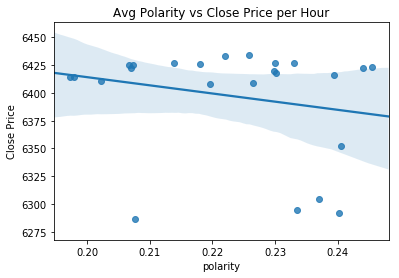

In [133]:
plotsentimentcorr(Series28_29GROUP, Bitcoin28_29)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


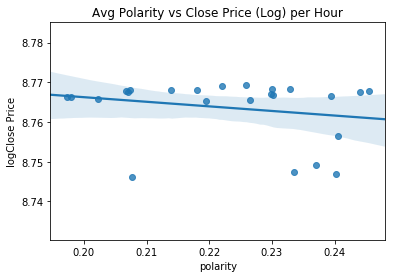

In [134]:
plotsentimentcorrLOG(Series28_29GROUP, Bitcoin28_29)

In [135]:
count28_29 = Series28_29.groupby(Series28_29.index.hour, sort=False).count()
count28_29 = count28_29.to_frame().reset_index()
count28_29 = count28_29.rename(columns={"polarity": "count"})
count28_29

Datetime  count
0          4   1291
1          5   1294
2          6   1330
3          7   1662
4          8   1536
5          9   1679
6         10   1763
7         11   1763
8         12   1836
9         13   2094
10        14   2139
11        15   2138
12        16   2334
13        17   2015
14        18   2043
15        19   2013
16        20   1992
17        21   1947
18        22   1775
19        23   1498
20         0   1479
21         1   1497
22         2   1608
23         3   1462

In [136]:
np.corrcoef(count28_29['count'], Bitcoin28_29['Close Price'])

array([[1.        , 0.46981655],
       [0.46981655, 1.        ]])

In [137]:
np.corrcoef(count28_29['count'], Bitcoin28_29['logClose Price'])

array([[1.        , 0.46921895],
       [0.46921895, 1.        ]])

In [138]:
#There is a moderate positive correlation between the two variables 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


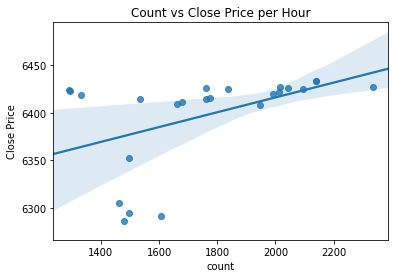

In [139]:
plotcountcorr(count28_29, Bitcoin28_29)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


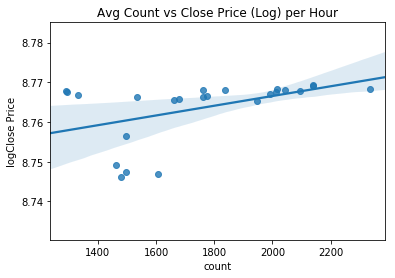

In [140]:
plotcountcorrLOG(count28_29, Bitcoin28_29)

In [141]:
#I will be following the same methodology as Tweets23_24 for the following day.
Tweets29_30.head()

id                                          tweet_url  \
0  1057117457704542209  https://twitter.com/RachelDav_pro/status/10571...   
1  1057117459377876992  https://twitter.com/Tom_and_Zenny/status/10571...   
2  1057117466495778817  https://twitter.com/BittrexPrices/status/10571...   
3  1057117468668264448  https://twitter.com/youdontknowbush/status/105...   
4  1057117469863825414  https://twitter.com/Karitra1/status/1057117469...   

                       created_at          parsed_created_at user_screen_name  \
0  Tue Oct 30 03:50:16 +0000 2018  2018-10-30T03:50:16+00:00    RachelDav_pro   
1  Tue Oct 30 03:50:17 +0000 2018  2018-10-30T03:50:17+00:00    Tom_and_Zenny   
2  Tue Oct 30 03:50:18 +0000 2018  2018-10-30T03:50:18+00:00    BittrexPrices   
3  Tue Oct 30 03:50:19 +0000 2018  2018-10-30T03:50:19+00:00  youdontknowbush   
4  Tue Oct 30 03:50:19 +0000 2018  2018-10-30T03:50:19+00:00         Karitra1   

                                                text tweet_type coordinates  \
0  RT @TheCurrencyA: Security Tokens Backed by Go...    retweet         NaN   
1                      レジェンドがひさびさに出た！ 盛り上がってきましたよ🚀🚀🚀      quote         NaN   
2  🔄 Prices update in $USDT (1 hour):  $BTC - 636...   original         NaN   
3  RT @Fullbeerbottle: Institutional money is rea...    retweet         NaN   
4  RT @KKcoinEX: Interesting..segregating returni...    retweet         NaN   

               hashtags media      ...       user_favourites_count  \
0  cryptocurrency token   NaN      ...                       16600   
1                   NaN   NaN      ...                        3391   
2                   NaN   NaN      ...                           3   
3                   NaN   NaN      ...                         507   
4                   NaN   NaN      ...                        2987   

   user_followers_count user_friends_count  user_listed_count  user_location  \
0                 22436              23617                 37             uk   
1                   104                256                  0            NaN   
2                   804                920                  8            NaN   
3                    56                146                  3    Seattle, WA   
4                  1256               3645                  2        Tunisie   

        user_name user_statuses_count  user_time_zone  user_urls  \
0   Alessia NyLah               37200             NaN        NaN   
1          トムとゼニー                 890             NaN        NaN   
2   BittrexPrices                5434             NaN        NaN   
3  SeñorCrypto 🤘🏾                 180             NaN        NaN   
4      Unifox ICO                3976             NaN        NaN   

   user_verified  
0          False  
1          False  
2          False  
3          False  
4          False  

[5 rows x 37 columns]

In [142]:
print(Tweets29_30['text'][0])
print(Tweets29_30['text'][3])

RT @TheCurrencyA: Security Tokens Backed by Gold and Silver Being Issued read more at: https://t.co/35WqxKgdwi   #cryptocurrency #token #bi…
RT @Fullbeerbottle: Institutional money is ready and willing to invest. Just not in your shitcoins, but they’ll happily sell the picks and…


In [143]:
CLEANTweets29_30 = cleantweetremovepattern(Tweets29_30)

*****************************
*****
*****


In [144]:
CLEANTweets29_30=tokenizeandstem(CLEANTweets29_30)

*****
*****


In [145]:
print(CLEANTweets29_30['tidy_tweet'][0])
print(CLEANTweets29_30['tidy_tweet'][3])


secur token back gold silver be issu read more
institut money readi will invest just your shitcoin they happili sell pick


In [146]:
CLEANTweets29_30=dropcolsremovenoneng(CLEANTweets29_30)

In [147]:
CLEANTweets29_30=Tweetsentiment(CLEANTweets29_30)

In [148]:
sentiment_series29_30 = CLEANTweets29_30 ['sentiment'].tolist()

columns = ['polarity', 'subjectivity']


POLARITY29_30  = pd.DataFrame(sentiment_series29_30, columns=columns, index=CLEANTweets29_30.index)

POLARITY28_29 = POLARITY28_29[POLARITY28_29.polarity != 0.0]


POLARITY29_30 ['Classification'] = np.where(POLARITY29_30['polarity']>=0, 'BULLISH', 'BEARISH')

POLARITY29_30 .head()

polarity  subjectivity Classification
0      0.25          0.25        BULLISH
2      0.00          0.00        BULLISH
3      0.00          0.00        BULLISH
4      0.60          1.00        BULLISH
5      0.00          0.00        BULLISH

In [149]:

Correlation29_30 = pd.concat([CLEANTweets29_30['created_at'], POLARITY29_30['polarity']], axis=1)

Correlation29_30['Datetime'] = pd.to_datetime(Correlation29_30['created_at'])

Correlation29_30 = Correlation29_30.set_index('Datetime')

Correlation29_30 = Correlation29_30.iloc[::-1]

Series29_30 = pd.Series(Correlation29_30['polarity'])

Series29_30GROUP = Series29_30.groupby(Series29_30.index.hour, sort=False).mean()

Series29_30GROUP = Series29_30GROUP.to_frame().reset_index()

Series29_30GROUP


Datetime  polarity
0          4  0.113480
1          5  0.115993
2          6  0.109919
3          7  0.104332
4          8  0.103969
5          9  0.107641
6         10  0.077236
7         11  0.066056
8         12  0.077304
9         13  0.095531
10        14  0.092280
11        15  0.103226
12        16  0.097661
13        17  0.110351
14        18  0.100987
15        19  0.096758
16        20  0.110381
17        21  0.108611
18        22  0.086760
19        23  0.092893
20         0  0.077410
21         1  0.100520
22         2  0.088215
23         3  0.090649

In [150]:
Bitcoin29_30 = Bitcoin[(Bitcoin['Datetime'] > '2018-10-29 15:00') & (Bitcoin['Datetime'] <= '2018-10-30 15:00')]
Bitcoin29_30 = Bitcoin29_30.loc[:,['Close Price','Datetime']]
Bitcoin29_30

Close Price            Datetime
184      6298.65 2018-10-29 16:00:00
185      6286.30 2018-10-29 17:00:00
186      6288.91 2018-10-29 18:00:00
187      6269.74 2018-10-29 19:00:00
188      6264.71 2018-10-29 20:00:00
189      6259.73 2018-10-29 21:00:00
190      6283.45 2018-10-29 22:00:00
191      6285.64 2018-10-29 23:00:00
192      6289.50 2018-10-30 00:00:00
193      6281.81 2018-10-30 01:00:00
194      6285.22 2018-10-30 02:00:00
195      6293.31 2018-10-30 03:00:00
196      6311.88 2018-10-30 04:00:00
197      6296.71 2018-10-30 05:00:00
198      6299.51 2018-10-30 06:00:00
199      6296.33 2018-10-30 07:00:00
200      6278.02 2018-10-30 08:00:00
201      6276.26 2018-10-30 09:00:00
202      6277.75 2018-10-30 10:00:00
203      6284.17 2018-10-30 11:00:00
204      6289.55 2018-10-30 12:00:00
205      6284.75 2018-10-30 13:00:00
206      6280.51 2018-10-30 14:00:00
207      6288.82 2018-10-30 15:00:00

In [151]:
Bitcoin29_30['logClose Price'] = np.log(Bitcoin29_30['Close Price'])

In [152]:
np.corrcoef(Series29_30GROUP['polarity'], Bitcoin29_30['Close Price'])

array([[ 1.        , -0.06001635],
       [-0.06001635,  1.        ]])

In [153]:
np.corrcoef(Series29_30GROUP['polarity'], Bitcoin29_30['logClose Price'])

array([[ 1.        , -0.06042883],
       [-0.06042883,  1.        ]])

In [154]:
#There is an extremely weak to no inverse correlation between these variables

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


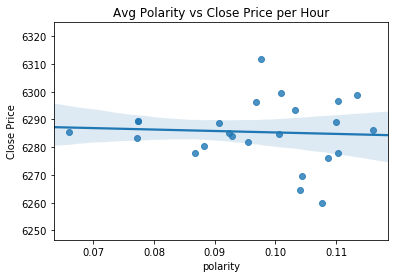

In [155]:
plotsentimentcorr(Series29_30GROUP, Bitcoin29_30)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


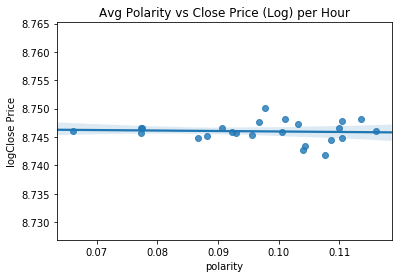

In [156]:
plotsentimentcorrLOG(Series29_30GROUP, Bitcoin29_30)

In [157]:
count29_30 = Series29_30.groupby(Series29_30.index.hour, sort=False).count()
count29_30 = count29_30.to_frame().reset_index()
count29_30 = count29_30.rename(columns={"polarity": "count"})
count29_30

Datetime  count
0          4   3238
1          5   3679
2          6   3915
3          7   4482
4          8   4254
5          9   4297
6         10   4637
7         11   5546
8         12   5676
9         13   5779
10        14   6080
11        15   6085
12        16   6002
13        17   5618
14        18   5703
15        19   5370
16        20   5639
17        21   4995
18        22   5230
19        23   4077
20         0   3907
21         1   3704
22         2   3996
23         3   3986

In [158]:
np.corrcoef(count29_30['count'], Bitcoin29_30['Close Price'])

array([[1.        , 0.26373496],
       [0.26373496, 1.        ]])

In [159]:
np.corrcoef(count29_30['count'], Bitcoin29_30['logClose Price'])

array([[1.        , 0.26359468],
       [0.26359468, 1.        ]])

In [160]:
#There is a moderate to weak correlation between the two variables

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


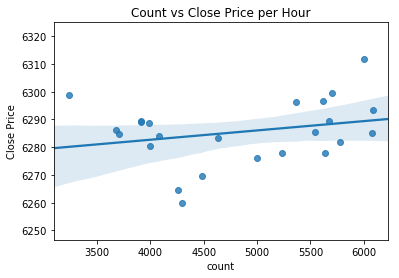

In [161]:
plotcountcorr(count29_30, Bitcoin29_30)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


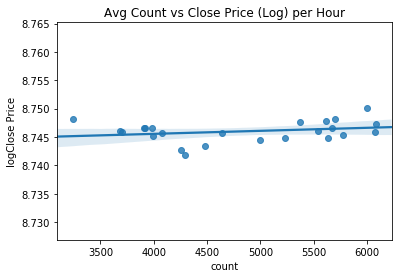

In [162]:
plotcountcorrLOG(count29_30, Bitcoin29_30)

In [163]:
#I will be following the same methodology as Tweets23_24 for the following day.
Tweets30_31.head()


id                                          tweet_url  \
0  1057479825747832833  https://twitter.com/zkSOvIT6HloFYjh/status/105...   
1  1057479833045909504  https://twitter.com/marko_55/status/1057479833...   
2  1057479834144772096  https://twitter.com/Melissa08514620/status/105...   
3  1057479834346180608  https://twitter.com/Karla63808972/status/10574...   
4  1057479834656522240  https://twitter.com/GlobalRENews/status/105747...   

                       created_at          parsed_created_at user_screen_name  \
0  Wed Oct 31 03:50:12 +0000 2018  2018-10-31T03:50:12+00:00  zkSOvIT6HloFYjh   
1  Wed Oct 31 03:50:13 +0000 2018  2018-10-31T03:50:13+00:00         marko_55   
2  Wed Oct 31 03:50:14 +0000 2018  2018-10-31T03:50:14+00:00  Melissa08514620   
3  Wed Oct 31 03:50:14 +0000 2018  2018-10-31T03:50:14+00:00    Karla63808972   
4  Wed Oct 31 03:50:14 +0000 2018  2018-10-31T03:50:14+00:00     GlobalRENews   

                                                text tweet_type coordinates  \
0  I’m donating 2 300  Bit coin to my followers. ...   original         NaN   
1  為替(18/10/31 12:50㈬現在)  米ドル → 113.24円 香港ドル → 14...   original         NaN   
2  @Tomm_Shelby Potent signals for #Binance, #Huo...      reply         NaN   
3  @antioch66837499 ‼️OMG I have made 1.11 BTC ju...      reply         NaN   
4  What's that? Why is that so good? This nice IC...   original         NaN   

                         hashtags media      ...       user_favourites_count  \
0                             NaN   NaN      ...                           0   
1                             NaN   NaN      ...                           0   
2  Binance Huobi OKEX Gate Kucoin   NaN      ...                           0   
3                             NaN   NaN      ...                           0   
4              Blockchain Bitcoin   NaN      ...                        3244   

   user_followers_count user_friends_count  user_listed_count   user_location  \
0                     0                  0                  0             NaN   
1                  4308               4268                 12             NaN   
2                     9                  0                  0             NaN   
3                     6                  0                  0             NaN   
4                 13439              14690                 88  Chesapeake, VA   

        user_name user_statuses_count  user_time_zone  user_urls  \
0  Глафира Белова                   1             NaN        NaN   
1             マルコ              386228             NaN        NaN   
2         Melissa                  53             NaN        NaN   
3           Karla                  54             NaN        NaN   
4    Asrem Chendo                5427             NaN        NaN   

   user_verified  
0          False  
1          False  
2          False  
3          False  
4          False  

[5 rows x 37 columns]

In [164]:
CLEANTweets30_31 = cleantweetremovepattern(Tweets30_31)
CLEANTweets30_31 = tokenizeandstem(CLEANTweets30_31)
print(Tweets30_31.shape)

*****************************
*****
*****
*****
*****
(146755, 38)


In [165]:
CLEANTweets30_31 = dropcolsremovenoneng(CLEANTweets30_31)

In [166]:
CLEANTweets30_31 = Tweetsentiment(CLEANTweets30_31)

In [167]:
sentiment_series30_31 = CLEANTweets30_31 ['sentiment'].tolist()

columns = ['polarity', 'subjectivity']


POLARITY30_31  = pd.DataFrame(sentiment_series30_31, columns=columns, index=CLEANTweets30_31.index)

POLARITY30_31 = POLARITY30_31[POLARITY30_31.polarity != 0.0]


POLARITY30_31 ['Classification'] = np.where(POLARITY30_31['polarity']>=0, 'BULLISH', 'BEARISH')

POLARITY30_31 .head()

polarity  subjectivity Classification
0 -0.016667      0.311111        BEARISH
2  0.500000      0.500000        BULLISH
3  0.400000      0.800000        BULLISH
4  0.666667      0.833333        BULLISH
8  0.250000      0.644444        BULLISH

In [168]:
Correlation30_31 = pd.concat([CLEANTweets30_31['created_at'], POLARITY29_30['polarity']], axis=1)

Correlation30_31['Datetime'] = pd.to_datetime(Correlation30_31['created_at'])

Correlation30_31 = Correlation30_31.set_index('Datetime')

Correlation30_31 = Correlation30_31.iloc[::-1]

Series30_31 = pd.Series(Correlation30_31['polarity'])

Series30_31GROUP = Series30_31.groupby(Series30_31.index.hour, sort=False).mean()

Series30_31GROUP = Series30_31GROUP.to_frame().reset_index()

Series30_31GROUP

Datetime  polarity
0        4.0  0.113167
1        5.0  0.107314
2        6.0  0.106347
3        7.0  0.103486
4        8.0  0.109663
5        9.0  0.080759
6       10.0  0.066187
7       11.0  0.077392
8       12.0  0.089950
9       13.0  0.100885
10      14.0  0.089060
11      15.0  0.102167
12      16.0  0.103062
13      17.0  0.107343
14      18.0  0.095629
15      19.0  0.104939
16      20.0  0.110914
17      21.0  0.091850
18      22.0  0.096237
19      23.0  0.083995
20       0.0  0.085756
21       1.0  0.097863
22       2.0  0.092227
23       3.0  0.089313

In [169]:
Bitcoin30_31 = Bitcoin[(Bitcoin['Datetime'] > '2018-10-30 15:00') & (Bitcoin['Datetime'] <= '2018-10-31 15:00')]
Bitcoin30_31 = Bitcoin30_31.loc[:,['Close Price','Datetime']]
Bitcoin30_31

Close Price            Datetime
208      6282.45 2018-10-30 16:00:00
209      6278.58 2018-10-30 17:00:00
210      6275.42 2018-10-30 18:00:00
211      6273.21 2018-10-30 19:00:00
212      6281.11 2018-10-30 20:00:00
213      6281.40 2018-10-30 21:00:00
214      6284.21 2018-10-30 22:00:00
215      6283.51 2018-10-30 23:00:00
216      6286.80 2018-10-31 00:00:00
217      6279.56 2018-10-31 01:00:00
218      6282.83 2018-10-31 02:00:00
219      6282.40 2018-10-31 03:00:00
220      6282.19 2018-10-31 04:00:00
221      6283.27 2018-10-31 05:00:00
222      6278.77 2018-10-31 06:00:00
223      6279.00 2018-10-31 07:00:00
224      6276.92 2018-10-31 08:00:00
225      6271.42 2018-10-31 09:00:00
226      6281.66 2018-10-31 10:00:00
227      6281.59 2018-10-31 11:00:00
228      6279.57 2018-10-31 12:00:00
229      6268.48 2018-10-31 13:00:00
230      6237.97 2018-10-31 14:00:00
231      6340.47 2018-10-31 15:00:00

In [170]:
Bitcoin30_31['logClose Price'] = np.log(Bitcoin30_31['Close Price'])

In [171]:
np.corrcoef(Series30_31GROUP['polarity'], Bitcoin30_31['Close Price'])

array([[ 1.        , -0.13117866],
       [-0.13117866,  1.        ]])

In [172]:
np.corrcoef(Series30_31GROUP['polarity'], Bitcoin30_31['logClose Price'])

array([[ 1.        , -0.13084651],
       [-0.13084651,  1.        ]])

In [173]:
#There is a weak inverse correlation between the two variables 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


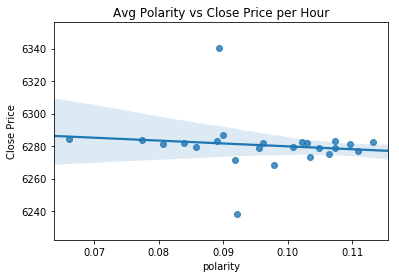

In [174]:
plotsentimentcorr(Series30_31GROUP, Bitcoin30_31)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


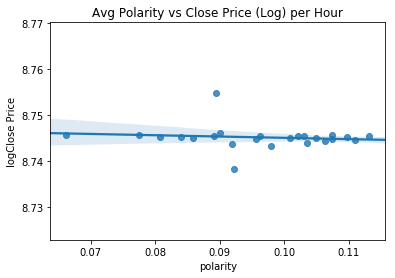

In [175]:
plotsentimentcorrLOG(Series30_31GROUP, Bitcoin30_31)

In [176]:
count30_31 = Series30_31.groupby(Series30_31.index.hour, sort=False).count()
count30_31 = count30_31.to_frame().reset_index()
count30_31 = count30_31.rename(columns={"polarity": "count"})
count30_31

Datetime  count
0        4.0   2953
1        5.0   3104
2        6.0   3281
3        7.0   3758
4        8.0   3467
5        9.0   3919
6       10.0   3729
7       11.0   4075
8       12.0   4246
9       13.0   4358
10      14.0   4351
11      15.0   4405
12      16.0   4615
13      17.0   4924
14      18.0   4561
15      19.0   4193
16      20.0   4063
17      21.0   4017
18      22.0   3452
19      23.0   3213
20       0.0   2874
21       1.0   2789
22       2.0   2964
23       3.0   2704

In [177]:
np.corrcoef(count30_31['count'], Bitcoin30_31['Close Price'])

array([[ 1.        , -0.04463456],
       [-0.04463456,  1.        ]])

In [178]:
np.corrcoef(count30_31['count'], Bitcoin30_31['logClose Price'])

array([[ 1.        , -0.04296288],
       [-0.04296288,  1.        ]])

In [179]:
#There is an extremely weak to no correlation between these two variables 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


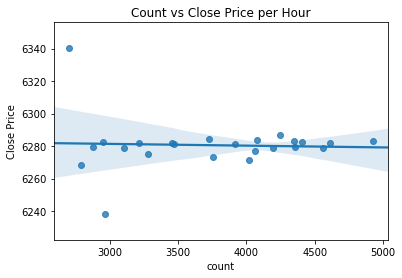

In [180]:
plotcountcorr(count30_31, Bitcoin30_31)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


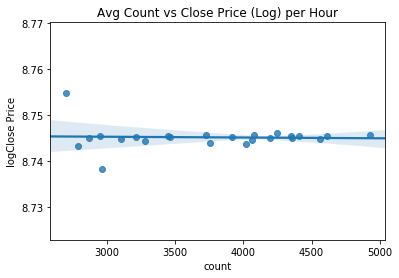

In [181]:
plotcountcorrLOG(count30_31, Bitcoin30_31)

In [182]:
#I will be following the same methodology as Tweets23_24 for the following day.
Tweets31_1.head()


id                                          tweet_url  \
0  1057842215668539392  https://twitter.com/telmaOldfieldj6/status/105...   
1  1057842220248625153  https://twitter.com/anastaciastaeh7/status/105...   
2  1057842221913796608  https://twitter.com/marko_55/status/1057842221...   
3  1057842224292073473  https://twitter.com/almdnath/status/1057842224...   
4  1057842228947640320  https://twitter.com/stf1k/status/1057842228947...   

                       created_at          parsed_created_at user_screen_name  \
0  Thu Nov 01 03:50:12 +0000 2018  2018-11-01T03:50:12+00:00  telmaOldfieldj6   
1  Thu Nov 01 03:50:13 +0000 2018  2018-11-01T03:50:13+00:00  anastaciastaeh7   
2  Thu Nov 01 03:50:14 +0000 2018  2018-11-01T03:50:14+00:00         marko_55   
3  Thu Nov 01 03:50:14 +0000 2018  2018-11-01T03:50:14+00:00         almdnath   
4  Thu Nov 01 03:50:15 +0000 2018  2018-11-01T03:50:15+00:00            stf1k   

                                                text tweet_type coordinates  \
0  RT @justinsuntron: Happy Halloween and 10 year...    retweet         NaN   
1  RT @justinsuntron: Happy Halloween and 10 year...    retweet         NaN   
2  為替(18/11/01 12:50㈭現在)  米ドル → 112.87円 香港ドル → 14...   original         NaN   
3  RT @marco19501: @KKcoinEX @coinbase It's great...    retweet         NaN   
4  #XBlock #Blockchain #Crypto #ether #ethereum #...      quote         NaN   

                                            hashtags media      ...        \
0                                   Bitcoin TRX TRON   NaN      ...         
1                                   Bitcoin TRX TRON   NaN      ...         
2                                                NaN   NaN      ...         
3                                ethereum BTC profit   NaN      ...         
4  XBlock Blockchain Crypto ether ethereum bitcoi...   NaN      ...         

  user_favourites_count  user_followers_count user_friends_count  \
0                     0                     0                  0   
1                     0                     0                  0   
2                     0                  4306               4267   
3                 62600                  1031                353   
4                 18912                  1364               1927   

   user_listed_count  user_location          user_name user_statuses_count  \
0                  0            NaN  telma Oldfield jr                  29   
1                  0            NaN  anastacia staehli                  31   
2                 12            NaN                マルコ              386372   
3                  2            013               nath               36522   
4                 12            NaN            Steffen               33936   

   user_time_zone  user_urls  user_verified  
0             NaN        NaN          False  
1             NaN        NaN          False  
2             NaN        NaN          False  
3             NaN        NaN          False  
4             NaN        NaN          False  

[5 rows x 37 columns]

In [183]:
CLEANTweets31_1=cleantweetremovepattern(Tweets31_1)
CLEANTweets31_1=tokenizeandstem(CLEANTweets31_1)
print(CLEANTweets31_1.shape)

*****************************
*****
*****
*****
*****
(179716, 38)


In [184]:
CLEANTweets31_1=dropcolsremovenoneng(CLEANTweets31_1)
CLEANTweets31_1=Tweetsentiment(CLEANTweets31_1)

In [185]:
sentiment_series31_1 = CLEANTweets31_1['sentiment'].tolist()

columns = ['polarity', 'subjectivity']


POLARITY31_1  = pd.DataFrame(sentiment_series31_1, columns=columns, index=CLEANTweets31_1.index)

POLARITY31_1 = POLARITY31_1[POLARITY31_1.polarity != 0.0]


POLARITY31_1 ['Classification'] = np.where(POLARITY31_1['polarity']>=0, 'BULLISH', 'BEARISH')

POLARITY31_1 .head()

polarity  subjectivity Classification
3        0.8          0.75        BULLISH
5        0.4          0.80        BULLISH
6        0.7          0.80        BULLISH
8        0.5          0.50        BULLISH
14       0.5          0.50        BULLISH

In [186]:
Correlation31_1 = pd.concat([CLEANTweets31_1['created_at'], POLARITY31_1['polarity']], axis=1)


Correlation31_1['Datetime'] = pd.to_datetime(Correlation31_1['created_at'])

Correlation31_1 = Correlation31_1.set_index('Datetime')

Correlation31_1 = Correlation31_1.iloc[::-1]



Series31_1 = pd.Series(Correlation31_1['polarity'])

Series31_1GROUP = Series31_1.groupby(Series31_1.index.hour, sort=False).mean()

Series31_1GROUP = Series31_1GROUP.to_frame().reset_index()

Series31_1GROUP

Datetime  polarity
0          4  0.268408
1          5  0.308936
2          6  0.301075
3          7  0.241449
4          8  0.183785
5          9  0.164186
6         10  0.155801
7         11  0.192622
8         12  0.190685
9         13  0.176210
10        14  0.211020
11        15  0.218293
12        16  0.229318
13        17  0.235341
14        18  0.246395
15        19  0.214732
16        20  0.194683
17        21  0.216568
18        22  0.221219
19        23  0.237999
20         0  0.215582
21         1  0.239468
22         2  0.253496
23         3  0.279405

In [187]:
Bitcoin31_1 = Bitcoin[(Bitcoin['Datetime'] > '2018-10-31 15:00') & (Bitcoin['Datetime'] <= '2018-11-1 15:00')]
Bitcoin31_1 = Bitcoin31_1.loc[:,['Close Price','Datetime']]
Bitcoin31_1

Close Price            Datetime
232      6325.38 2018-10-31 16:00:00
233      6308.83 2018-10-31 17:00:00
234      6317.57 2018-10-31 18:00:00
235      6320.55 2018-10-31 19:00:00
236      6318.86 2018-10-31 20:00:00
237      6318.53 2018-10-31 21:00:00
238      6326.77 2018-10-31 22:00:00
239      6320.45 2018-10-31 23:00:00
240      6319.60 2018-11-01 00:00:00
241      6317.36 2018-11-01 01:00:00
242      6317.32 2018-11-01 02:00:00
243      6312.26 2018-11-01 03:00:00
244      6316.90 2018-11-01 04:00:00
245      6313.33 2018-11-01 05:00:00
246      6323.61 2018-11-01 06:00:00
247      6329.50 2018-11-01 07:00:00
248      6319.77 2018-11-01 08:00:00
249      6322.12 2018-11-01 09:00:00
250      6322.90 2018-11-01 10:00:00
251      6322.67 2018-11-01 11:00:00
252      6318.58 2018-11-01 12:00:00
253      6317.05 2018-11-01 13:00:00
254      6320.14 2018-11-01 14:00:00
255      6320.00 2018-11-01 15:00:00

In [188]:
Bitcoin31_1['logClose Price'] = np.log(Bitcoin31_1['Close Price'])

In [189]:
np.corrcoef(Series31_1GROUP['polarity'], Bitcoin31_1['Close Price'])

array([[ 1.        , -0.27096806],
       [-0.27096806,  1.        ]])

In [190]:
np.corrcoef(Series31_1GROUP['polarity'], Bitcoin31_1['logClose Price'])

array([[ 1.        , -0.27109308],
       [-0.27109308,  1.        ]])

In [191]:
#This is a weak inverse relationship

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


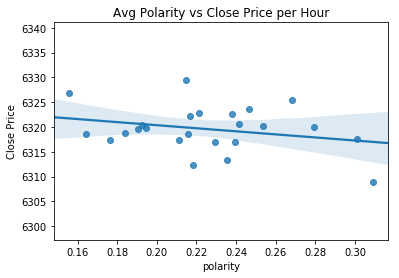

In [192]:
plotsentimentcorr(Series31_1GROUP, Bitcoin31_1)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


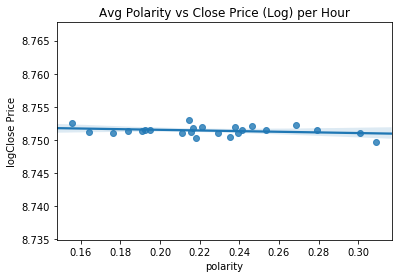

In [193]:
plotsentimentcorrLOG(Series31_1GROUP, Bitcoin31_1)

In [194]:
count31_1 = Series31_1.groupby(Series31_1.index.hour, sort=False).count()
count31_1 = count31_1.to_frame().reset_index()
count31_1 = count31_1.rename(columns={"polarity": "count"})
count31_1

Datetime  count
0          4   1579
1          5   1776
2          6   1937
3          7   2140
4          8   2153
5          9   2194
6         10   2385
7         11   2482
8         12   2966
9         13   3098
10        14   2958
11        15   3104
12        16   3126
13        17   3101
14        18   2867
15        19   2514
16        20   2307
17        21   2234
18        22   2180
19        23   2050
20         0   1898
21         1   1524
22         2   1635
23         3   1673

In [195]:
np.corrcoef(count31_1['count'], Bitcoin31_1['Close Price'])

array([[ 1.        , -0.15447764],
       [-0.15447764,  1.        ]])

In [196]:
np.corrcoef(count31_1['count'], Bitcoin31_1['logClose Price'])

array([[ 1.        , -0.15448892],
       [-0.15448892,  1.        ]])

In [197]:
#This is a very weak inverse relationship

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


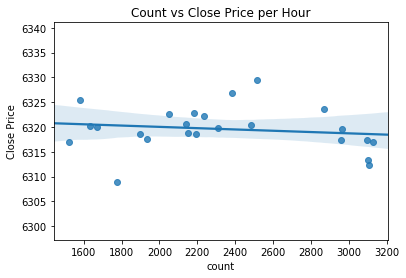

In [198]:
plotcountcorr(count31_1, Bitcoin31_1)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


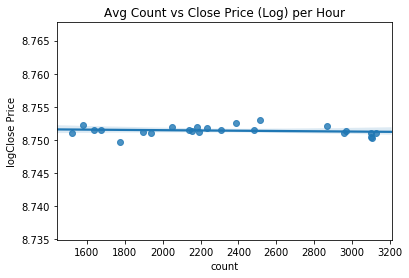

In [199]:
plotcountcorrLOG(count31_1, Bitcoin31_1)

In [200]:
#I will be following the same methodology as Tweets23_24 for the following day.

Tweets1_2.head()

id                                          tweet_url  \
0  1058204609062162432  https://twitter.com/marko_55/status/1058204609...   
1  1058204609729171457  https://twitter.com/cryptocrasher/status/10582...   
2  1058204615513178113  https://twitter.com/karlacasillas20/status/105...   
3  1058204622563639296  https://twitter.com/accevqhie/status/105820462...   
4  1058204626426556418  https://twitter.com/ArkanFandi/status/10582046...   

                       created_at          parsed_created_at user_screen_name  \
0  Fri Nov 02 03:50:13 +0000 2018  2018-11-02T03:50:13+00:00         marko_55   
1  Fri Nov 02 03:50:14 +0000 2018  2018-11-02T03:50:14+00:00    cryptocrasher   
2  Fri Nov 02 03:50:15 +0000 2018  2018-11-02T03:50:15+00:00  karlacasillas20   
3  Fri Nov 02 03:50:17 +0000 2018  2018-11-02T03:50:17+00:00        accevqhie   
4  Fri Nov 02 03:50:18 +0000 2018  2018-11-02T03:50:18+00:00       ArkanFandi   

                                                text tweet_type coordinates  \
0  為替(18/11/02 12:50㈮現在)  米ドル → 112.67円 香港ドル → 14...   original         NaN   
1  RT @AlppIsik: Bitcoin ile ilgili en sevdiğim g...    retweet         NaN   
2  RT @MEXICOpuntoCOM: Un 31 de octubre de 2008 S...    retweet         NaN   
3  @PEndrule @sayamira @citra_ik @JesmanTampubol1...      quote         NaN   
4                       Mencoba main bitcoin (lagi).   original         NaN   

  hashtags                                              media      ...        \
0      NaN                                                NaN      ...         
1  bitcoin  https://twitter.com/AlppIsik/status/1058110558...      ...         
2      NaN                                                NaN      ...         
3      NaN                                                NaN      ...         
4      NaN                                                NaN      ...         

  user_favourites_count  user_followers_count user_friends_count  \
0                     0                  4304               4267   
1                    16                    13                211   
2                  1072                  1635               2277   
3                   992                   241                516   
4                     0                     2                 12   

   user_listed_count           user_location       user_name  \
0                 12                     NaN             マルコ   
1                  0                İstanbul  Crypto Crasher   
2                  0           Benito Juárez  Karla Casillas   
3                  1                     NaN         Asep ER   
4                  0  Jakarta Capital Region     Fandi Arkan   

  user_statuses_count  user_time_zone  user_urls  user_verified  
0              386516             NaN        NaN          False  
1                  28             NaN        NaN          False  
2                2756             NaN        NaN          False  
3                1197             NaN        NaN          False  
4                   7             NaN        NaN          False  

[5 rows x 37 columns]

In [201]:
CLEANTweets1_2 = cleantweetremovepattern(Tweets1_2)
CLEANTweets1_2 = tokenizeandstem(CLEANTweets1_2)
print(CLEANTweets1_2.shape)

*****************************
*****
*****
*****
*****
(139128, 38)


In [202]:
CLEANTweets1_2 = dropcolsremovenoneng(CLEANTweets1_2)

In [203]:
CLEANTweets1_2 = Tweetsentiment(CLEANTweets1_2)

In [204]:
CLEANTweets1_2.head()

created_at lang         user_location  \
5   Fri Nov 02 03:50:18 +0000 2018   en                 Tokyo   
6   Fri Nov 02 03:50:18 +0000 2018   en                   NaN   
8   Fri Nov 02 03:50:20 +0000 2018   en  Salt Lake City, Utah   
9   Fri Nov 02 03:50:22 +0000 2018   en                   NaN   
10  Fri Nov 02 03:50:22 +0000 2018   en                   NaN   

                                                 text  \
5   RT @nathanielpopper: A mysterious buyer snappe...   
6   Web #Developer - Manchester. - Monarch IT ( Ma...   
8   @digitsu Coin burns mean that the founders eit...   
9   RT @kucoincom: We are launching a listing prom...   
10  100 TRX when registering. 50 TRX for member re...   

                                           tidy_tweet  \
5   mysteri buyer snap acr nevada desert earlier t...   
6   #develop manchest monarch manchest unit kingdo...   
8   coin burn mean that founder either plan poorli...   
9         launch list promot with total reward detail   
10  when regist member referr best invest best profit   

                    sentiment  
5   (0.0, 0.2833333333333333)  
6                  (0.5, 0.5)  
8           (-0.3125, 0.6875)  
9                 (0.0, 0.75)  
10                 (1.0, 0.3)

In [205]:
sentiment_series1_2 = CLEANTweets1_2['sentiment'].tolist()

columns = ['polarity', 'subjectivity']


POLARITY1_2   = pd.DataFrame(sentiment_series1_2 , columns=columns, index=CLEANTweets1_2.index)

POLARITY1_2 = POLARITY1_2[POLARITY1_2.polarity != 0.0]


POLARITY1_2  ['Classification'] = np.where(POLARITY1_2 ['polarity']>=0, 'BULLISH', 'BEARISH')

POLARITY1_2  .head()

polarity  subjectivity Classification
6     0.5000        0.5000        BULLISH
8    -0.3125        0.6875        BEARISH
10    1.0000        0.3000        BULLISH
12    0.6000        1.0000        BULLISH
15    0.5000        0.5000        BULLISH

In [206]:

Correlation1_2 = pd.concat([CLEANTweets1_2['created_at'], POLARITY1_2['polarity']], axis=1)

Correlation1_2['Datetime'] = pd.to_datetime(Correlation1_2['created_at'])

Correlation1_2 = Correlation1_2.set_index('Datetime')

Correlation1_2 = Correlation1_2.iloc[::-1]



Series1_2 = pd.Series(Correlation1_2['polarity'])

Series1_2GROUP = Series1_2.groupby(Series1_2.index.hour, sort=False).mean()

Series1_2GROUP = Series1_2GROUP.to_frame().reset_index()

Series1_2GROUP

Datetime  polarity
0          4  0.272104
1          5  0.280019
2          6  0.240338
3          7  0.251584
4          8  0.261696
5          9  0.260711
6         10  0.267328
7         11  0.306300
8         12  0.272537
9         13  0.204014
10        14  0.232299
11        15  0.229171
12        16  0.239543
13        17  0.232320
14        18  0.225032
15        19  0.245041
16        20  0.233653
17        21  0.215640
18        22  0.216028
19        23  0.231513
20         0  0.254326
21         1  0.253807
22         2  0.252910
23         3  0.250959

In [207]:
Bitcoin1_2 = Bitcoin[(Bitcoin['Datetime'] > '2018-11-1 15:00') & (Bitcoin['Datetime'] <= '2018-11-2 15:00')]
Bitcoin1_2 = Bitcoin1_2.loc[:,['Close Price','Datetime']]
Bitcoin1_2

Close Price            Datetime
256      6319.00 2018-11-01 16:00:00
257      6322.70 2018-11-01 17:00:00
258      6326.92 2018-11-01 18:00:00
259      6335.13 2018-11-01 19:00:00
260      6351.45 2018-11-01 20:00:00
261      6358.59 2018-11-01 21:00:00
262      6353.16 2018-11-01 22:00:00
263      6356.72 2018-11-01 23:00:00
264      6389.18 2018-11-02 00:00:00
265      6385.89 2018-11-02 01:00:00
266      6371.96 2018-11-02 02:00:00
267      6374.51 2018-11-02 03:00:00
268      6371.23 2018-11-02 04:00:00
269      6371.25 2018-11-02 05:00:00
270      6368.61 2018-11-02 06:00:00
271      6366.32 2018-11-02 07:00:00
272      6359.10 2018-11-02 08:00:00
273      6351.73 2018-11-02 09:00:00
274      6354.07 2018-11-02 10:00:00
275      6364.33 2018-11-02 11:00:00
276      6361.98 2018-11-02 12:00:00
277      6374.70 2018-11-02 13:00:00
278      6382.25 2018-11-02 14:00:00
279      6374.19 2018-11-02 15:00:00

In [208]:
Bitcoin1_2['logClose Price'] = np.log(Bitcoin1_2['Close Price'])

In [209]:
np.corrcoef(Series1_2GROUP['polarity'], Bitcoin1_2['Close Price'])

array([[ 1.        , -0.31666811],
       [-0.31666811,  1.        ]])

In [210]:
np.corrcoef(Series1_2GROUP['polarity'], Bitcoin1_2['logClose Price'])

array([[ 1.        , -0.31688757],
       [-0.31688757,  1.        ]])

In [211]:
#There is a moderate to weak inverse relationship for these variables 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


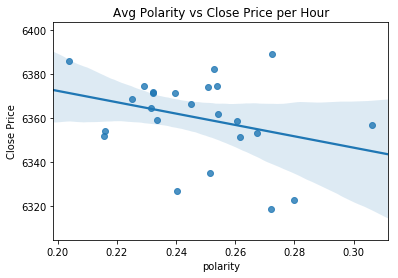

In [212]:
plotsentimentcorr(Series1_2GROUP, Bitcoin1_2)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


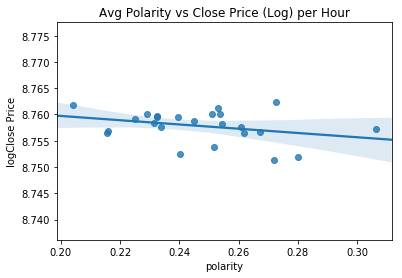

In [213]:
plotsentimentcorrLOG(Series1_2GROUP, Bitcoin1_2)

In [214]:
count1_2 = Series1_2.groupby(Series1_2.index.hour, sort=False).count()
count1_2 = count1_2.to_frame().reset_index()
count1_2 = count1_2.rename(columns={"polarity": "count"})
count1_2

Datetime  count
0          4   1579
1          5   1631
2          6   1671
3          7   2030
4          8   1780
5          9   1734
6         10    666
7         11   2175
8         12   2597
9         13   2349
10        14   2177
11        15   2572
12        16   2326
13        17   2468
14        18   2416
15        19   2113
16        20   1969
17        21   1926
18        22   1679
19        23   1673
20         0   1533
21         1   1317
22         2   1431
23         3   1345

In [215]:
np.corrcoef(count1_2['count'], Bitcoin1_2['Close Price'])

array([[1.        , 0.34940387],
       [0.34940387, 1.        ]])

In [216]:
np.corrcoef(count1_2['count'], Bitcoin1_2['logClose Price'])

array([[1.        , 0.34913068],
       [0.34913068, 1.        ]])

In [217]:
#There is a weak positive correlation between these variables 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


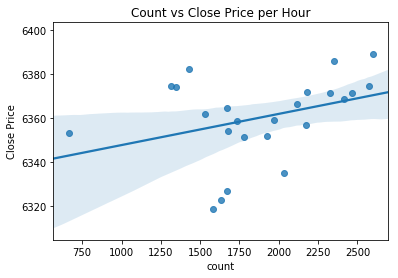

In [218]:
plotcountcorr(count1_2, Bitcoin1_2)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


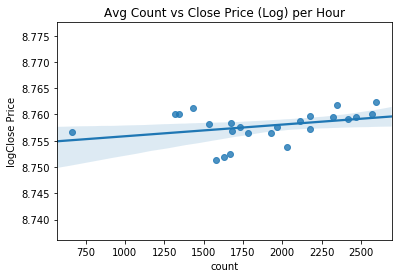

In [219]:
plotcountcorrLOG(count1_2, Bitcoin1_2)

In [220]:
#I am flipping the dataframes upside down in preparation to conacatonate them all, I want the latest date on top and earliest on the bottom
CLEANTweets23_24 = CleanTweets23_24.iloc[::-1]
CLEANTweets24_25 = CLEANTweets24_25.iloc[::-1]
CLEANTweets25_26 = CLEANTweets25_26.iloc[::-1]
CLEANTweets26_27 = CLEANTweets26_27.iloc[::-1]
CLEANTweets27_28 = CLEANTweets27_28.iloc[::-1]
CLEANTweets28_29 = CLEANTweets28_29.iloc[::-1]
CLEANTweets29_30 = CLEANTweets29_30.iloc[::-1]
CLEANTweets30_31 = CLEANTweets30_31.iloc[::-1]
CLEANTweets31_1 = CLEANTweets31_1.iloc[::-1]
CLEANTweets1_2 = CLEANTweets1_2.iloc[::-1]



In [221]:
#Create a list with all the dataframes, then concatonate them,

frames = (CLEANTweets23_24, CLEANTweets24_25, CLEANTweets25_26, CLEANTweets26_27, CLEANTweets27_28, CLEANTweets28_29, CLEANTweets29_30, CLEANTweets30_31, CLEANTweets31_1, CLEANTweets1_2)

TOTALTweets = pd.concat(frames).reset_index(drop=True)

In [222]:
#I will be following the same methodology as Tweets23_24 for the following day.

sentiment_seriesTotal = TOTALTweets  ['sentiment'].tolist()

columns = ['polarity', 'subjectivity']


POLARITYTotal   = pd.DataFrame(sentiment_seriesTotal)

POLARITYTotal = POLARITYTotal[POLARITYTotal.polarity != 0.0]


POLARITYTotal  ['Classification'] = np.where(POLARITYTotal ['polarity']>=0, 'BULLISH', 'BEARISH')

POLARITYTotal.reset_index()
POLARITYTotal.head()

polarity  subjectivity Classification
2  0.183333      0.208333        BULLISH
3  0.136667      0.263333        BULLISH
7  0.400000      0.800000        BULLISH
8  0.175000      0.366667        BULLISH
9  0.400000      0.800000        BULLISH

In [223]:
CorrelationTotal = pd.concat([TOTALTweets['created_at'], POLARITYTotal['polarity']], axis=1)

CorrelationTotal['Datetime'] = pd.to_datetime(CorrelationTotal['created_at'])


CorrelationTotal = CorrelationTotal.set_index('Datetime')

SeriesTotal = pd.Series(CorrelationTotal['polarity'])

SeriesGROUPTOTAL = SeriesTotal.groupby(SeriesTotal.index.day, sort=False).mean()

SeriesGROUPTOTAL = SeriesGROUPTOTAL.to_frame().reset_index()

SeriesGROUPTOTAL

Datetime  polarity
0         23  0.193431
1         24  0.222072
2         25  0.182610
3         26  0.198085
4         27  0.209462
5         28  0.220720
6         29  0.217906
7         30  0.232230
8         31  0.223697
9          1  0.244669
10         2  0.253098

In [224]:
#Import Bitcoin price per day
BitcoinPerday = pd.read_csv('Bitcoinperday.csv')

In [225]:
BitcoinPerday

Date  Close Price
0   10/23/18 0:00      6434.25
1   10/24/18 0:00      6450.31
2   10/25/18 0:00      6427.40
3   10/26/18 0:00      6436.97
4   10/27/18 0:00      6431.09
5   10/28/18 0:00      6426.55
6   10/29/18 0:00      6285.23
7   10/30/18 0:00      6283.53
8   10/31/18 0:00      6320.46
9    11/1/18 0:00      6358.40
10   11/2/18 0:00      6368.85

In [226]:
BitcoinPerday['logClose Price'] = np.log(BitcoinPerday['Close Price'])

In [227]:
np.corrcoef(SeriesGROUPTOTAL['polarity'], BitcoinPerday['Close Price'])

array([[ 1.        , -0.50556489],
       [-0.50556489,  1.        ]])

In [228]:
np.corrcoef(SeriesGROUPTOTAL['polarity'], BitcoinPerday['logClose Price'])

array([[ 1.        , -0.50422432],
       [-0.50422432,  1.        ]])

In [229]:
#There is an inverse moderate correlation

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


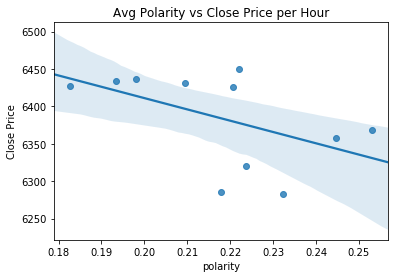

In [230]:
plotsentimentcorr(SeriesGROUPTOTAL, BitcoinPerday)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


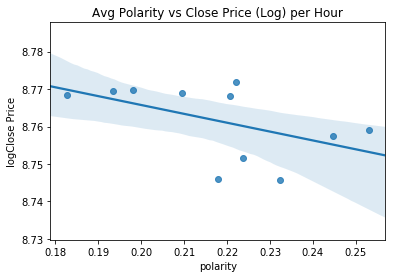

In [231]:
plotsentimentcorrLOG(SeriesGROUPTOTAL, BitcoinPerday)

In [232]:
countTOTAL = SeriesTotal.groupby(SeriesTotal.index.day, sort=False).count()
countTOTAL = countTOTAL.to_frame().reset_index()
countTOTAL = countTOTAL.rename(columns={"polarity": "count"})
countTOTAL


Datetime  count
0         23  46937
1         24  52247
2         25  47148
3         26  47671
4         27  41355
5         28  41370
6         29  51372
7         30  49025
8         31  55523
9          1  46264
10         2   5687

In [233]:
np.corrcoef(countTOTAL['count'], BitcoinPerday['Close Price'])

array([[ 1.        , -0.07664609],
       [-0.07664609,  1.        ]])

In [234]:
np.corrcoef(countTOTAL['count'], BitcoinPerday['logClose Price'])

array([[ 1.        , -0.07835645],
       [-0.07835645,  1.        ]])

In [235]:
#There is an extremely weak inverse to no correlation between these variables 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


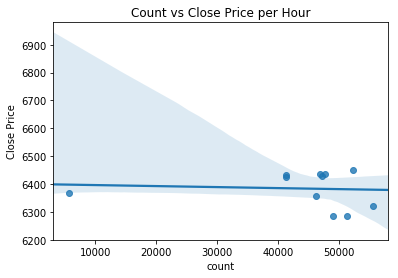

In [236]:
plotcountcorr(countTOTAL, BitcoinPerday)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


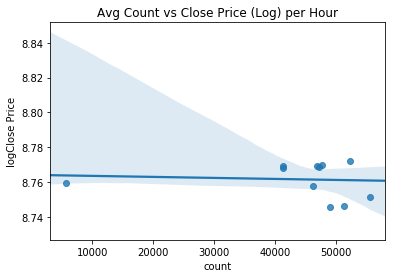

In [237]:
plotcountcorrLOG(countTOTAL, BitcoinPerday)

In [238]:
#Import the necessary packages to create the word clouds
import os
os.path
from wordcloud import WordCloud


In [239]:
def wordcloud(df):
    """This function creates the word clouds based of the tidy_tweet column."""
    all_words = ' '.join([text for text in df['tidy_tweet']])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

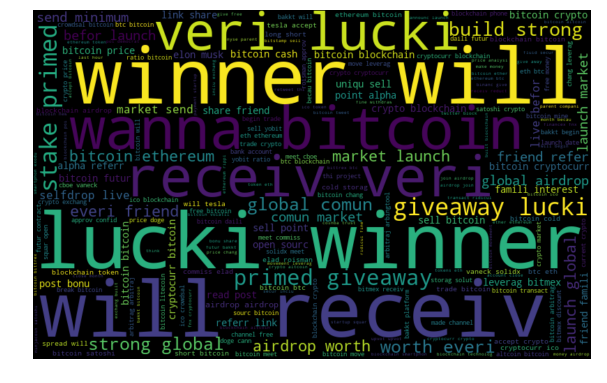

In [240]:
wordcloud(Tweets23_24)

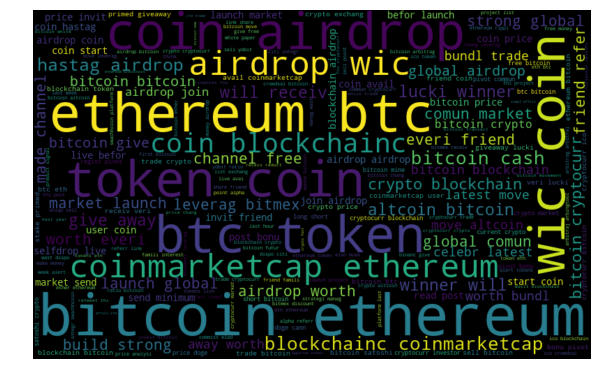

In [241]:
wordcloud(Tweets24_25)

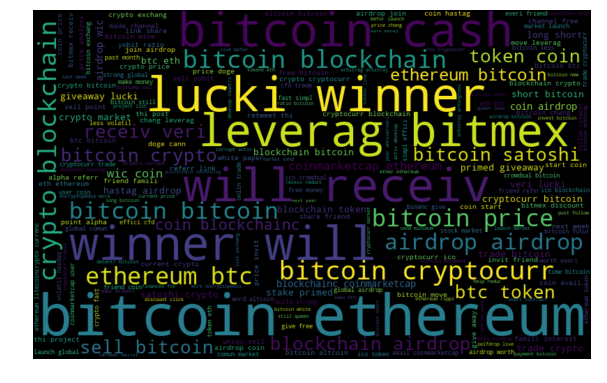

In [242]:
wordcloud(Tweets25_26)

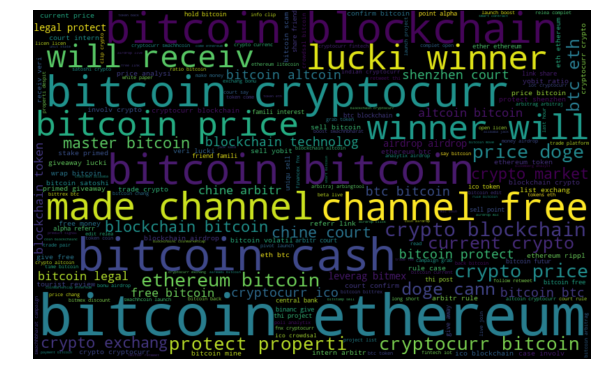

In [243]:
wordcloud(Tweets26_27)

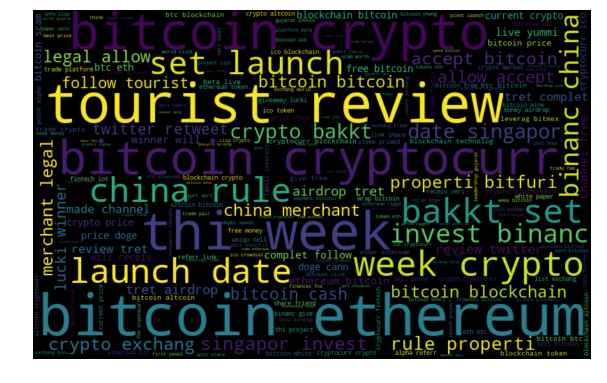

In [244]:
wordcloud(Tweets27_28)

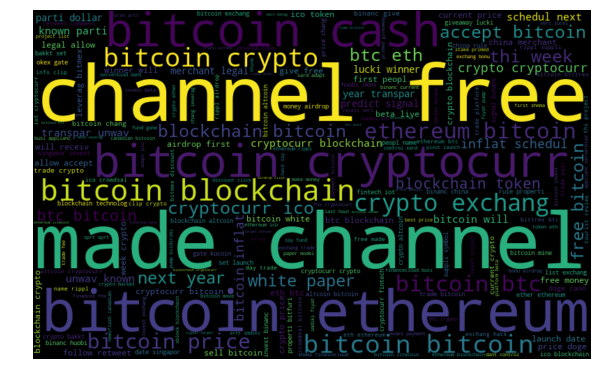

In [245]:
wordcloud(Tweets28_29)

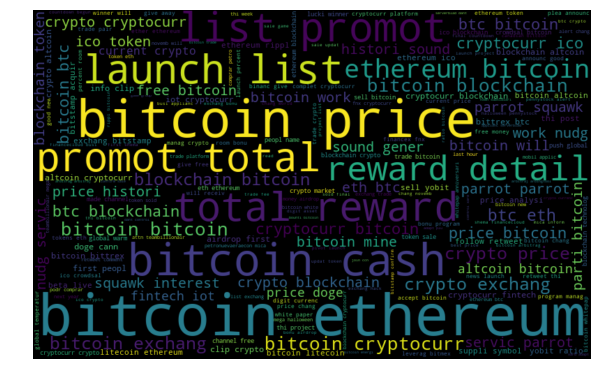

In [246]:
wordcloud(Tweets29_30)

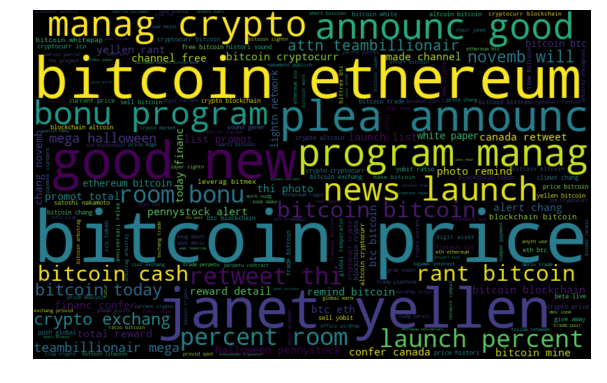

In [247]:
wordcloud(Tweets30_31)

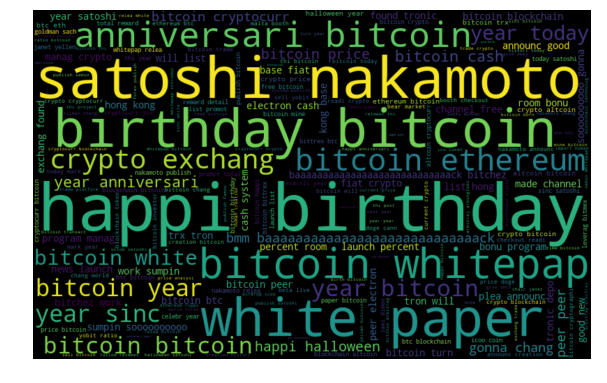

In [248]:
wordcloud(Tweets31_1)

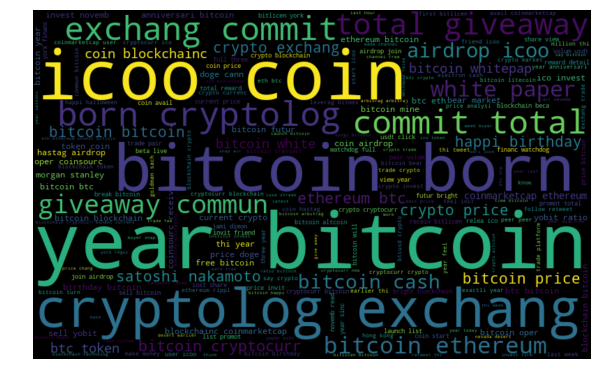

In [249]:
wordcloud(Tweets1_2)

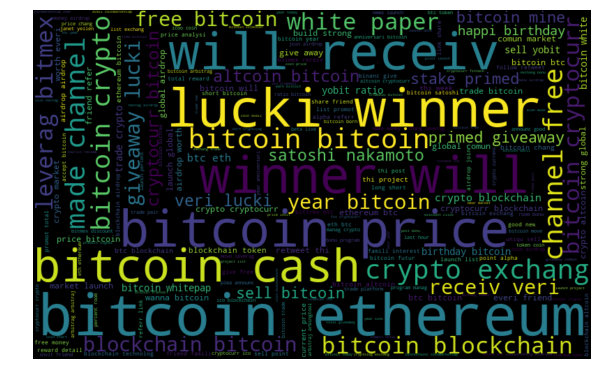

In [250]:
wordcloud(TOTALTweets)

In [251]:
#This line chart, created with plotly, shows the Bitcoin Price per hour.
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('Insert USER NAME HERE', 'Insert API HERE')
trace1 = {
  "x": ["2018-10-22 00:00:00", "2018-10-22 01:00:00", "2018-10-22 02:00:00", "2018-10-22 03:00:00", "2018-10-22 04:00:00", "2018-10-22 05:00:00", "2018-10-22 06:00:00", "2018-10-22 07:00:00", "2018-10-22 08:00:00", "2018-10-22 09:00:00", "2018-10-22 10:00:00", "2018-10-22 11:00:00", "2018-10-22 12:00:00", "2018-10-22 13:00:00", "2018-10-22 14:00:00", "2018-10-22 15:00:00", "2018-10-22 16:00:00", "2018-10-22 17:00:00", "2018-10-22 18:00:00", "2018-10-22 19:00:00", "2018-10-22 20:00:00", "2018-10-22 21:00:00", "2018-10-22 22:00:00", "2018-10-22 23:00:00", "2018-10-23 00:00:00", "2018-10-23 01:00:00", "2018-10-23 02:00:00", "2018-10-23 03:00:00", "2018-10-23 04:00:00", "2018-10-23 05:00:00", "2018-10-23 06:00:00", "2018-10-23 07:00:00", "2018-10-23 08:00:00", "2018-10-23 09:00:00", "2018-10-23 10:00:00", "2018-10-23 11:00:00", "2018-10-23 12:00:00", "2018-10-23 13:00:00", "2018-10-23 14:00:00", "2018-10-23 15:00:00", "2018-10-23 16:00:00", "2018-10-23 17:00:00", "2018-10-23 18:00:00", "2018-10-23 19:00:00", "2018-10-23 20:00:00", "2018-10-23 21:00:00", "2018-10-23 22:00:00", "2018-10-23 23:00:00", "2018-10-24 00:00:00", "2018-10-24 01:00:00", "2018-10-24 02:00:00", "2018-10-24 03:00:00", "2018-10-24 04:00:00", "2018-10-24 05:00:00", "2018-10-24 06:00:00", "2018-10-24 07:00:00", "2018-10-24 08:00:00", "2018-10-24 09:00:00", "2018-10-24 10:00:00", "2018-10-24 11:00:00", "2018-10-24 12:00:00", "2018-10-24 13:00:00", "2018-10-24 14:00:00", "2018-10-24 15:00:00", "2018-10-24 16:00:00", "2018-10-24 17:00:00", "2018-10-24 18:00:00", "2018-10-24 19:00:00", "2018-10-24 20:00:00", "2018-10-24 21:00:00", "2018-10-24 22:00:00", "2018-10-24 23:00:00", "2018-10-25 00:00:00", "2018-10-25 01:00:00", "2018-10-25 02:00:00", "2018-10-25 03:00:00", "2018-10-25 04:00:00", "2018-10-25 05:00:00", "2018-10-25 06:00:00", "2018-10-25 07:00:00", "2018-10-25 08:00:00", "2018-10-25 09:00:00", "2018-10-25 10:00:00", "2018-10-25 11:00:00", "2018-10-25 12:00:00", "2018-10-25 13:00:00", "2018-10-25 14:00:00", "2018-10-25 15:00:00", "2018-10-25 16:00:00", "2018-10-25 17:00:00", "2018-10-25 18:00:00", "2018-10-25 19:00:00", "2018-10-25 20:00:00", "2018-10-25 21:00:00", "2018-10-25 22:00:00", "2018-10-25 23:00:00", "2018-10-26 00:00:00", "2018-10-26 01:00:00", "2018-10-26 02:00:00", "2018-10-26 03:00:00", "2018-10-26 04:00:00", "2018-10-26 05:00:00", "2018-10-26 06:00:00", "2018-10-26 07:00:00", "2018-10-26 08:00:00", "2018-10-26 09:00:00", "2018-10-26 10:00:00", "2018-10-26 11:00:00", "2018-10-26 12:00:00", "2018-10-26 13:00:00", "2018-10-26 14:00:00", "2018-10-26 15:00:00", "2018-10-26 16:00:00", "2018-10-26 17:00:00", "2018-10-26 18:00:00", "2018-10-26 19:00:00", "2018-10-26 20:00:00", "2018-10-26 21:00:00", "2018-10-26 22:00:00", "2018-10-26 23:00:00", "2018-10-27 00:00:00", "2018-10-27 01:00:00", "2018-10-27 02:00:00", "2018-10-27 03:00:00", "2018-10-27 04:00:00", "2018-10-27 05:00:00", "2018-10-27 06:00:00", "2018-10-27 07:00:00", "2018-10-27 08:00:00", "2018-10-27 09:00:00", "2018-10-27 10:00:00", "2018-10-27 11:00:00", "2018-10-27 12:00:00", "2018-10-27 13:00:00", "2018-10-27 14:00:00", "2018-10-27 15:00:00", "2018-10-27 16:00:00", "2018-10-27 17:00:00", "2018-10-27 18:00:00", "2018-10-27 19:00:00", "2018-10-27 20:00:00", "2018-10-27 21:00:00", "2018-10-27 22:00:00", "2018-10-27 23:00:00", "2018-10-28 00:00:00", "2018-10-28 01:00:00", "2018-10-28 02:00:00", "2018-10-28 03:00:00", "2018-10-28 04:00:00", "2018-10-28 05:00:00", "2018-10-28 06:00:00", "2018-10-28 07:00:00", "2018-10-28 08:00:00", "2018-10-28 09:00:00", "2018-10-28 10:00:00", "2018-10-28 11:00:00", "2018-10-28 12:00:00", "2018-10-28 13:00:00", "2018-10-28 14:00:00", "2018-10-28 15:00:00", "2018-10-28 16:00:00", "2018-10-28 17:00:00", "2018-10-28 18:00:00", "2018-10-28 19:00:00", "2018-10-28 20:00:00", "2018-10-28 21:00:00", "2018-10-28 22:00:00", "2018-10-28 23:00:00", "2018-10-29 00:00:00", "2018-10-29 01:00:00", "2018-10-29 02:00:00", "2018-10-29 03:00:00", "2018-10-29 04:00:00", "2018-10-29 05:00:00", "2018-10-29 06:00:00", "2018-10-29 07:00:00", "2018-10-29 08:00:00", "2018-10-29 09:00:00", "2018-10-29 10:00:00", "2018-10-29 11:00:00", "2018-10-29 12:00:00", "2018-10-29 13:00:00", "2018-10-29 14:00:00", "2018-10-29 15:00:00", "2018-10-29 16:00:00", "2018-10-29 17:00:00", "2018-10-29 18:00:00", "2018-10-29 19:00:00", "2018-10-29 20:00:00", "2018-10-29 21:00:00", "2018-10-29 22:00:00", "2018-10-29 23:00:00", "2018-10-30 00:00:00", "2018-10-30 01:00:00", "2018-10-30 02:00:00", "2018-10-30 03:00:00", "2018-10-30 04:00:00", "2018-10-30 05:00:00", "2018-10-30 06:00:00", "2018-10-30 07:00:00", "2018-10-30 08:00:00", "2018-10-30 09:00:00", "2018-10-30 10:00:00", "2018-10-30 11:00:00", "2018-10-30 12:00:00", "2018-10-30 13:00:00", "2018-10-30 14:00:00", "2018-10-30 15:00:00", "2018-10-30 16:00:00", "2018-10-30 17:00:00", "2018-10-30 18:00:00", "2018-10-30 19:00:00", "2018-10-30 20:00:00", "2018-10-30 21:00:00", "2018-10-30 22:00:00", "2018-10-30 23:00:00", "2018-10-31 00:00:00", "2018-10-31 01:00:00", "2018-10-31 02:00:00", "2018-10-31 03:00:00", "2018-10-31 04:00:00", "2018-10-31 05:00:00", "2018-10-31 06:00:00", "2018-10-31 07:00:00", "2018-10-31 08:00:00", "2018-10-31 09:00:00", "2018-10-31 10:00:00", "2018-10-31 11:00:00", "2018-10-31 12:00:00", "2018-10-31 13:00:00", "2018-10-31 14:00:00", "2018-10-31 15:00:00", "2018-10-31 16:00:00", "2018-10-31 17:00:00", "2018-10-31 18:00:00", "2018-10-31 19:00:00", "2018-10-31 20:00:00", "2018-10-31 21:00:00", "2018-10-31 22:00:00", "2018-10-31 23:00:00", "2018-11-01 00:00:00", "2018-11-01 01:00:00", "2018-11-01 02:00:00", "2018-11-01 03:00:00", "2018-11-01 04:00:00", "2018-11-01 05:00:00", "2018-11-01 06:00:00", "2018-11-01 07:00:00", "2018-11-01 08:00:00", "2018-11-01 09:00:00", "2018-11-01 10:00:00", "2018-11-01 11:00:00", "2018-11-01 12:00:00", "2018-11-01 13:00:00", "2018-11-01 14:00:00", "2018-11-01 15:00:00", "2018-11-01 16:00:00", "2018-11-01 17:00:00", "2018-11-01 18:00:00", "2018-11-01 19:00:00", "2018-11-01 20:00:00", "2018-11-01 21:00:00", "2018-11-01 22:00:00", "2018-11-01 23:00:00", "2018-11-02 00:00:00", "2018-11-02 01:00:00", "2018-11-02 02:00:00", "2018-11-02 03:00:00", "2018-11-02 04:00:00", "2018-11-02 05:00:00", "2018-11-02 06:00:00", "2018-11-02 07:00:00", "2018-11-02 08:00:00", "2018-11-02 09:00:00", "2018-11-02 10:00:00", "2018-11-02 11:00:00", "2018-11-02 12:00:00", "2018-11-02 13:00:00", "2018-11-02 14:00:00", "2018-11-02 15:00:00", "2018-11-02 16:00:00", "2018-11-02 17:00:00", "2018-11-02 18:00:00", "2018-11-02 19:00:00", "2018-11-02 20:00:00", "2018-11-02 21:00:00", "2018-11-02 22:00:00", "2018-11-02 23:00:00", "", "This data was produced from the CoinDesk price page.", "http://www.coindesk.com/price/"], 
  "y": ["6451.57", "6461.78", "6455.3", "6456.11", "6467.04", "6467.97", "6467.03", "6457.63", "6441.17", "6447.31", "6446.42", "6446.28", "6445.3", "6441.06", "6434.41", "6437.77", "6442.74", "6442.78", "6433.68", "6430.42", "6454.82", "6446.3", "6446.4", "6448.54", "6452.69", "6452.86", "6450.2", "6435.25", "6447.61", "6445.46", "6442.05", "6439.33", "6440.64", "6428.25", "6415.17", "6414.76", "6433.9", "6433.33", "6428.04", "6429.34", "6436.83", "6427.46", "6433.18", "6446.85", "6433.65", "6434.8", "6431.91", "6434.06", "6441.63", "6440.87", "6443.18", "6455.67", "6495.1", "6480.92", "6480.44", "6477.4", "6471.47", "6472.52", "6476.72", "6468.01", "6474.25", "6476.31", "6478.53", "6459.53", "6467.84", "6467.92", "6464.53", "6459.63", "6462.33", "6464.91", "6452.66", "6450.21", "6457.29", "6415.91", "6425.91", "6426.32", "6430.55", "6429.41", "6438", "6436.88", "6438.07", "6432.09", "6428.25", "6430.98", "6437.58", "6445.15", "6438.91", "6433.67", "6436.36", "6434.39", "6450.21", "6442.68", "6436.51", "6434.61", "6445.23", "6428.96", "6432.04", "6426.67", "6425.99", "6424.88", "6421.06", "6427.38", "6427.58", "6421.05", "6467.15", "6451.72", "6450.63", "6449.43", "6438.44", "6426.26", "6433.06", "6431.37", "6441.1", "6440.6", "6434.69", "6434.57", "6437.25", "6432.22", "6437.28", "6436.85", "6440.87", "6444.13", "6443.01", "6448.9", "6448.35", "6445.56", "6448.05", "6446.13", "6439.61", "6442.89", "6434.45", "6434.46", "6435.03", "6426.2", "6422.75", "6420.19", "6424.12", "6426.57", "6419.57", "6423.76", "6424.32", "6432.69", "6433.57", "6431.11", "6427.2", "6427.39", "6428.64", "6428.29", "6431.22", "6435.06", "6427.5", "6426.28", "6424.36", "6424.21", "6423.07", "6422.12", "6425.07", "6430.58", "6428.39", "6420.96", "6423.74", "6422.54", "6418.34", "6409.17", "6414.14", "6411.08", "6414.8", "6426.54", "6425.27", "6424.78", "6433.77", "6433", "6427.28", "6427.33", "6426.42", "6422.13", "6419.43", "6407.66", "6415.78", "6352.19", "6286.31", "6294.9", "6291.49", "6304.8", "6298.65", "6286.3", "6288.91", "6269.74", "6264.71", "6259.73", "6283.45", "6285.64", "6289.5", "6281.81", "6285.22", "6293.31", "6311.88", "6296.71", "6299.51", "6296.33", "6278.02", "6276.26", "6277.75", "6284.17", "6289.55", "6284.75", "6280.51", "6288.82", "6282.45", "6278.58", "6275.42", "6273.21", "6281.11", "6281.4", "6284.21", "6283.51", "6286.8", "6279.56", "6282.83", "6282.4", "6282.19", "6283.27", "6278.77", "6279", "6276.92", "6271.42", "6281.66", "6281.59", "6279.57", "6268.48", "6237.97", "6340.47", "6325.38", "6308.83", "6317.57", "6320.55", "6318.86", "6318.53", "6326.77", "6320.45", "6319.6", "6317.36", "6317.32", "6312.26", "6316.9", "6313.33", "6323.61", "6329.5", "6319.77", "6322.12", "6322.9", "6322.67", "6318.58", "6317.05", "6320.14", "6320", "6319", "6322.7", "6326.92", "6335.13", "6351.45", "6358.59", "6353.16", "6356.72", "6389.18", "6385.89", "6371.96", "6374.51", "6371.23", "6371.25", "6368.61", "6366.32", "6359.1", "6351.73", "6354.07", "6364.33", "6361.98", "6374.7", "6382.25", "6374.19", "6366.61", "6366.87", "6368.43", "6373.9", "6370.61", "6374.8", "6366.51", "6368.32"], 
  "mode": "lines", 
  "type": "scatter", 
  "xsrc": "Jfogerty:0:ca5df1", 
  "ysrc": "Jfogerty:0:b09d52"
}
data = Data([trace1])
layout = {
  "autosize": True, 
  "colorway": ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"], 
  "font": {"family": "Arial"}, 
  "hovermode": "closest", 
  "title": "Bitcoin price per hour", 
  "xaxis": {
    "autorange": True, 
    "range": ["2018-10-22", "2018-11-02 23:00"], 
    "showspikes": True, 
    "type": "date"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [6223.685, 6509.385], 
    "showspikes": True, 
    "type": "linear"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)


/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [ ]:
#This line chart, created with plotly, shows the Bitcoin Price per Day.
py.sign_in('Insert USER NAME HERE', 'Insert API HERE')
trace1 = {
  "x": ["10/23/18", "10/24/18", "10/25/18", "10/26/18", "10/27/18", "10/28/18", "10/29/18", "10/30/18", "10/31/18", "11/1/18", "11/2/18"], 
  "y": ["6434.25", "6450.31", "6427.4", "6436.97", "6431.09", "6426.55", "6285.23", "6283.53", "6320.46", "6358.4", "6368.85"], 
  "mode": "lines", 
  "type": "scatter", 
  "uid": "1bb72f62-e8f5-11e8-821a-f218983a3ed3", 
  "xsrc": "Jfogerty:28:dcfbf4", 
  "ysrc": "Jfogerty:28:600b8e"
}
data = Data([trace1])
layout = {
  "autosize": True, 
  "title": "Bitcoin Close Price per Day", 
  "xaxis": {
    "autorange": True, 
    "range": [0, 10], 
    "showspikes": True, 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [6274.26444444, 6459.57555556], 
    "showspikes": True, 
    "type": "linear"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

In [ ]:
#Concat the series that have the average polarity by hour, we want to plot this.
Seriesframes = (Series23_24GROUP, Series24_25GROUP, Series25_26GROUP, Series26_27GROUP, Series27_28GROUP, Series28_29GROUP, Series29_30GROUP, Series30_31GROUP, Series31_1GROUP, Series1_2GROUP)
                
TotalSeries = pd.concat(Seriesframes).reset_index(drop=True)

In [ ]:
#Next I exported the series to an excel file and added a date time column, The same was done for the count plot.
#The following function was used:
#TotalSeries = pd.read_excel('COUNTPERDAY.xlsx')
#TotalSeries = TotalSeries.set_index('Datetime')
#TotalSeries

In [ ]:
#This line chart, created with plotly, shows the Average Polarity per hour.
py.sign_in('Insert USER NAME HERE', 'Insert API HERE')
trace1 = {
  "x": ["Date Time", "10/23/18 16:00", "10/23/18 17:00", "10/23/18 18:00", "10/23/18 19:00", "10/23/18 20:00", "10/23/18 21:00", "10/23/18 22:00", "10/23/18 23:00", "10/25/18 0:00", "10/24/18 1:00", "10/24/18 2:00", "10/24/18 3:00", "10/24/18 4:00", "10/24/18 5:00", "10/24/18 6:00", "10/24/18 7:00", "10/24/18 8:00", "10/24/18 9:00", "10/24/18 10:00", "10/24/18 11:00", "10/24/18 12:00", "10/24/18 13:00", "10/24/18 14:00", "10/24/18 15:00", "10/24/18 16:00", "10/24/18 17:00", "10/24/18 18:00", "10/24/18 19:00", "10/24/18 20:00", "10/24/18 21:00", "10/24/18 22:00", "10/24/18 23:00", "10/26/18 0:00", "10/25/18 1:00", "10/25/18 2:00", "10/25/18 3:00", "10/25/18 4:00", "10/25/18 5:00", "10/25/18 6:00", "10/25/18 7:00", "10/25/18 8:00", "10/25/18 9:00", "10/25/18 10:00", "10/25/18 11:00", "10/25/18 12:00", "10/25/18 13:00", "10/25/18 14:00", "10/25/18 15:00", "10/25/18 16:00", "10/25/18 17:00", "10/25/18 18:00", "10/25/18 19:00", "10/25/18 20:00", "10/25/18 21:00", "10/25/18 22:00", "10/25/18 23:00", "10/27/18 0:00", "10/26/18 1:00", "10/26/18 2:00", "10/26/18 3:00", "10/26/18 4:00", "10/26/18 5:00", "10/26/18 6:00", "10/26/18 7:00", "10/26/18 8:00", "10/26/18 9:00", "10/26/18 10:00", "10/26/18 11:00", "10/26/18 12:00", "10/26/18 13:00", "10/26/18 14:00", "10/26/18 15:00", "10/26/18 16:00", "10/26/18 17:00", "10/26/18 18:00", "10/26/18 19:00", "10/26/18 20:00", "10/26/18 21:00", "10/26/18 22:00", "10/26/18 23:00", "10/28/18 0:00", "10/27/18 1:00", "10/27/18 2:00", "10/27/18 3:00", "10/27/18 4:00", "10/27/18 5:00", "10/27/18 6:00", "10/27/18 7:00", "10/27/18 8:00", "10/27/18 9:00", "10/27/18 10:00", "10/27/18 11:00", "10/27/18 12:00", "10/27/18 13:00", "10/27/18 14:00", "10/27/18 15:00", "10/27/18 16:00", "10/27/18 17:00", "10/27/18 18:00", "10/27/18 19:00", "10/27/18 20:00", "10/27/18 21:00", "10/27/18 22:00", "10/27/18 23:00", "10/29/18 0:00", "10/28/18 1:00", "10/28/18 2:00", "10/28/18 3:00", "10/28/18 4:00", "10/28/18 5:00", "10/28/18 6:00", "10/28/18 7:00", "10/28/18 8:00", "10/28/18 9:00", "10/28/18 10:00", "10/28/18 11:00", "10/28/18 12:00", "10/28/18 13:00", "10/28/18 14:00", "10/28/18 15:00", "10/28/18 16:00", "10/28/18 17:00", "10/28/18 18:00", "10/28/18 19:00", "10/28/18 20:00", "10/28/18 21:00", "10/28/18 22:00", "10/28/18 23:00", "10/30/18 0:00", "10/29/18 1:00", "10/29/18 2:00", "10/29/18 3:00", "10/29/18 4:00", "10/29/18 5:00", "10/29/18 6:00", "10/29/18 7:00", "10/29/18 8:00", "10/29/18 9:00", "10/29/18 10:00", "10/29/18 11:00", "10/29/18 12:00", "10/29/18 13:00", "10/29/18 14:00", "10/29/18 15:00", "10/29/18 16:00", "10/29/18 17:00", "10/29/18 18:00", "10/29/18 19:00", "10/29/18 20:00", "10/29/18 21:00", "10/29/18 22:00", "10/29/18 23:00", "10/31/18 0:00", "10/30/18 1:00", "10/30/18 2:00", "10/30/18 3:00", "10/30/18 4:00", "10/30/18 5:00", "10/30/18 6:00", "10/30/18 7:00", "10/30/18 8:00", "10/30/18 9:00", "10/30/18 10:00", "10/30/18 11:00", "10/30/18 12:00", "10/30/18 13:00", "10/30/18 14:00", "10/30/18 15:00", "10/30/18 16:00", "10/30/18 17:00", "10/30/18 18:00", "10/30/18 19:00", "10/30/18 20:00", "10/30/18 21:00", "10/30/18 22:00", "10/30/18 23:00", "11/1/18 0:00", "10/31/18 1:00", "10/31/18 2:00", "10/31/18 3:00", "10/31/18 4:00", "10/31/18 5:00", "10/31/18 6:00", "10/31/18 7:00", "10/31/18 8:00", "10/31/18 9:00", "10/31/18 10:00", "10/31/18 11:00", "10/31/18 12:00", "10/31/18 13:00", "10/31/18 14:00", "10/31/18 15:00", "10/31/18 16:00", "10/31/18 17:00", "10/31/18 18:00", "10/31/18 19:00", "10/31/18 20:00", "10/31/18 21:00", "10/31/18 22:00", "10/31/18 23:00", "11/2/18 0:00", "11/1/18 1:00", "11/1/18 2:00", "11/1/18 3:00", "11/1/18 4:00", "11/1/18 5:00", "11/1/18 6:00", "11/1/18 7:00", "11/1/18 8:00", "11/1/18 9:00", "11/1/18 10:00", "11/1/18 11:00", "11/1/18 12:00", "11/1/18 13:00", "11/1/18 14:00", "11/1/18 15:00", "11/1/18 16:00", "11/1/18 17:00", "11/1/18 18:00", "11/1/18 19:00", "11/1/18 20:00", "11/1/18 21:00", "11/1/18 22:00", "11/1/18 23:00", "11/3/18 0:00", "11/2/18 1:00", "11/2/18 2:00", "11/2/18 3:00", "11/2/18 4:00", "11/2/18 5:00", "11/2/18 6:00", "11/2/18 7:00", "11/2/18 8:00", "11/2/18 9:00", "11/2/18 10:00", "11/2/18 11:00", "11/2/18 12:00", "11/2/18 13:00", "11/2/18 14:00", "11/2/18 15:00"], 
  "y": ["polarity", "0.212101844", "0.210227645", "0.196631632", "0.205993419", "0.181688102", "0.175785368", "0.203546436", "0.166215876", "0.187624033", "0.164545652", "0.186177466", "0.209285569", "0.183223047", "0.213445174", "0.212141228", "0.204417857", "0.181293052", "0.183042117", "0.211445364", "0.202092084", "0.206005778", "0.188692974", "0.19766388", "0.211778173", "0.211725358", "0.212111022", "0.214412778", "0.205685205", "0.237416781", "0.247134773", "0.236767111", "0.226165827", "0.233650991", "0.258423991", "0.238043919", "0.238398365", "0.21911513", "0.22270588", "0.231536637", "0.215785902", "0.18558534", "0.226229601", "0.205628677", "0.206551703", "0.156709966", "0.176722179", "0.167668557", "0.187015832", "0.173086324", "0.185440422", "0.170717032", "0.177725528", "0.189930005", "0.169433349", "0.179818091", "0.157126229", "0.188964025", "0.174769134", "0.183863414", "0.192467954", "0.172563349", "0.17131057", "0.186512711", "0.193565369", "0.214622111", "0.19943006", "0.213703815", "0.225956286", "0.186136997", "0.184240893", "0.19024396", "0.207304401", "0.206055737", "0.205293662", "0.202460243", "0.218394505", "0.195758857", "0.192608766", "0.197817265", "0.193595204", "0.211906009", "0.203922556", "0.191151277", "0.198596399", "0.1885074", "0.20526649", "0.219446707", "0.213891987", "0.187962089", "0.204600629", "0.163270213", "0.17519", "0.164504431", "0.205710715", "0.223162958", "0.202238627", "0.200578686", "0.199541105", "0.194806129", "0.198724877", "0.188831825", "0.215084785", "0.222030694", "0.218108108", "0.237229818", "0.199632191", "0.23330736", "0.214653826", "0.215225679", "0.187079805", "0.225213659", "0.19374359", "0.21710885", "0.207014486", "0.211287345", "0.236129886", "0.20530333", "0.22629735", "0.20327351", "0.218241083", "0.245423397", "0.206993146", "0.230157545", "0.226423408", "0.197328108", "0.202266071", "0.197881094", "0.213847582", "0.207343409", "0.206654474", "0.22582272", "0.222061458", "0.230009517", "0.232960551", "0.217984731", "0.243992207", "0.229786763", "0.219536891", "0.239362401", "0.240465466", "0.207710861", "0.233556175", "0.240188684", "0.237034673", "0.113479773", "0.115993297", "0.109919264", "0.104332144", "0.103968894", "0.107641186", "0.077235905", "0.066056037", "0.07730353", "0.095531189", "0.092280075", "0.103226123", "0.097661498", "0.110350911", "0.100987253", "0.096758402", "0.110380706", "0.108611361", "0.086760458", "0.092893339", "0.077409744", "0.100519576", "0.088214725", "0.090649207", "0.113166759", "0.107314035", "0.106346795", "0.103486351", "0.109662706", "0.080758881", "0.066186953", "0.077392367", "0.089950182", "0.100885078", "0.089059531", "0.102167421", "0.103061597", "0.107343299", "0.095629045", "0.10493939", "0.110914049", "0.09184976", "0.096236631", "0.083995473", "0.085756049", "0.097863494", "0.092227418", "0.089312916", "0.268407773", "0.308936387", "0.30107538", "0.241448909", "0.183785044", "0.164186452", "0.15580117", "0.192621993", "0.190684952", "0.176209614", "0.211020156", "0.218293264", "0.229318027", "0.235341239", "0.246394831", "0.214731861", "0.194683003", "0.216567698", "0.221218877", "0.237999041", "0.21558177", "0.239468208", "0.253495872", "0.279405252", "0.109449406", "0.110804826", "0.104229334", "0.092613208", "0.072411294", "0.065485224", "0.089192763", "0.087010339", "0.092047298", "0.093273885", "0.10430487", "0.093530961", "0.103838939", "0.109031641", "0.094521222", "0.106569452", "0.108034531", "0.105480841", "0.090732983", "0.085031831", "0.084167939", "0.098574875", "0.084031427", "0.08290718"], 
  "mode": "lines", 
  "type": "scatter", 
  "xsrc": "Jfogerty:31:5e2fb9", 
  "ysrc": "Jfogerty:31:7600c8"
}
data = Data([trace1])
layout = {
  "autosize": True, 
  "dragmode": "zoom", 
  "hovermode": "closest", 
  "title": "Average Polarity per Hour", 
  "xaxis": {
    "autorange": True, 
    "range": [0, 240], 
    "showspikes": True, 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [0.0519601593889, 0.322461451611], 
    "showspikes": True, 
    "type": "linear"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

In [ ]:
#This line chart, created with plotly, shows the Average Polarity per Day.
py.sign_in('Insert USER NAME HERE', 'Insert API HERE')
trace1 = {
  "x": ["Datetime", "10/23/18", "10/24/18", "10/25/18", "10/26/18", "10/27/18", "10/28/18", "10/29/18", "10/30/18", "10/31/18", "11/1/18", "11/2/18"], 
  "y": ["polarity", "0.193431222", "0.222072084", "0.182609784", "0.198084835", "0.209462067", "0.220719708", "0.217905948", "0.232229851", "0.223696518", "0.244669214", "0.253097526"], 
  "mode": "lines", 
  "type": "scatter", 
  "xsrc": "Jfogerty:43:7e4324", 
  "ysrc": "Jfogerty:43:981b17"
}
data = Data([trace1])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "title": "Average Polarity per Day", 
  "xaxis": {
    "autorange": True, 
    "range": [0, 11], 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [0.178693798333, 0.257013511667], 
    "type": "linear"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

In [ ]:
#The same action was performed on count, and was also exported to a excel file. 

Countframes = (count23_24, count24_25, count25_26, count26_27, count27_28, count28_29, count29_30, count30_31, count31_1, count31_1)
                
TotalCount = pd.concat(Countframes).reset_index(drop=True)

In [ ]:
#This line chart, created with plotly, shows the Tweet Count per hour.

py.sign_in('Insert USER NAME HERE', 'Insert API HERE')
trace1 = {
  "x": ["Date Time", "10/23/18 16:00", "10/23/18 17:00", "10/23/18 18:00", "10/23/18 19:00", "10/23/18 20:00", "10/23/18 21:00", "10/23/18 22:00", "10/23/18 23:00", "10/24/18 0:00", "10/24/18 1:00", "10/24/18 2:00", "10/24/18 3:00", "10/24/18 4:00", "10/24/18 5:00", "10/24/18 6:00", "10/24/18 7:00", "10/24/18 8:00", "10/24/18 9:00", "10/24/18 10:00", "10/24/18 11:00", "10/24/18 12:00", "10/24/18 13:00", "10/24/18 14:00", "10/24/18 15:00", "10/24/18 16:00", "10/24/18 17:00", "10/24/18 18:00", "10/24/18 19:00", "10/24/18 20:00", "10/24/18 21:00", "10/24/18 22:00", "10/24/18 23:00", "10/25/18 0:00", "10/25/18 1:00", "10/25/18 2:00", "10/25/18 3:00", "10/25/18 4:00", "10/25/18 5:00", "10/25/18 6:00", "10/25/18 7:00", "10/25/18 8:00", "10/25/18 9:00", "10/25/18 10:00", "10/25/18 11:00", "10/25/18 12:00", "10/25/18 13:00", "10/25/18 14:00", "10/25/18 15:00", "10/25/18 16:00", "10/25/18 17:00", "10/25/18 18:00", "10/25/18 19:00", "10/25/18 20:00", "10/25/18 21:00", "10/25/18 22:00", "10/25/18 23:00", "10/26/18 0:00", "10/26/18 1:00", "10/26/18 2:00", "10/26/18 3:00", "10/26/18 4:00", "10/26/18 5:00", "10/26/18 6:00", "10/26/18 7:00", "10/26/18 8:00", "10/26/18 9:00", "10/26/18 10:00", "10/26/18 11:00", "10/26/18 12:00", "10/26/18 13:00", "10/26/18 14:00", "10/26/18 15:00", "10/26/18 16:00", "10/26/18 17:00", "10/26/18 18:00", "10/26/18 19:00", "10/26/18 20:00", "10/26/18 21:00", "10/26/18 22:00", "10/26/18 23:00", "10/27/18 0:00", "10/27/18 1:00", "10/27/18 2:00", "10/27/18 3:00", "10/27/18 4:00", "10/27/18 5:00", "10/27/18 6:00", "10/27/18 7:00", "10/27/18 8:00", "10/27/18 9:00", "10/27/18 10:00", "10/27/18 11:00", "10/27/18 12:00", "10/27/18 13:00", "10/27/18 14:00", "10/27/18 15:00", "10/27/18 16:00", "10/27/18 17:00", "10/27/18 18:00", "10/27/18 19:00", "10/27/18 20:00", "10/27/18 21:00", "10/27/18 22:00", "10/27/18 23:00", "10/28/18 0:00", "10/28/18 1:00", "10/28/18 2:00", "10/28/18 3:00", "10/28/18 4:00", "10/28/18 5:00", "10/28/18 6:00", "10/28/18 7:00", "10/28/18 8:00", "10/28/18 9:00", "10/28/18 10:00", "10/28/18 11:00", "10/28/18 12:00", "10/28/18 13:00", "10/28/18 14:00", "10/28/18 15:00", "10/28/18 16:00", "10/28/18 17:00", "10/28/18 18:00", "10/28/18 19:00", "10/28/18 20:00", "10/28/18 21:00", "10/28/18 22:00", "10/28/18 23:00", "10/29/18 0:00", "10/29/18 1:00", "10/29/18 2:00", "10/29/18 3:00", "10/29/18 4:00", "10/29/18 5:00", "10/29/18 6:00", "10/29/18 7:00", "10/29/18 8:00", "10/29/18 9:00", "10/29/18 10:00", "10/29/18 11:00", "10/29/18 12:00", "10/29/18 13:00", "10/29/18 14:00", "10/29/18 15:00", "10/29/18 16:00", "10/29/18 17:00", "10/29/18 18:00", "10/29/18 19:00", "10/29/18 20:00", "10/29/18 21:00", "10/29/18 22:00", "10/29/18 23:00", "10/30/18 0:00", "10/30/18 1:00", "10/30/18 2:00", "10/30/18 3:00", "10/30/18 4:00", "10/30/18 5:00", "10/30/18 6:00", "10/30/18 7:00", "10/30/18 8:00", "10/30/18 9:00", "10/30/18 10:00", "10/30/18 11:00", "10/30/18 12:00", "10/30/18 13:00", "10/30/18 14:00", "10/30/18 15:00", "10/30/18 16:00", "10/30/18 17:00", "10/30/18 18:00", "10/30/18 19:00", "10/30/18 20:00", "10/30/18 21:00", "10/30/18 22:00", "10/30/18 23:00", "10/31/18 0:00", "10/31/18 1:00", "10/31/18 2:00", "10/31/18 3:00", "10/31/18 4:00", "10/31/18 5:00", "10/31/18 6:00", "10/31/18 7:00", "10/31/18 8:00", "10/31/18 9:00", "10/31/18 10:00", "10/31/18 11:00", "10/31/18 12:00", "10/31/18 13:00", "10/31/18 14:00", "10/31/18 15:00", "10/31/18 16:00", "10/31/18 17:00", "10/31/18 18:00", "10/31/18 19:00", "10/31/18 20:00", "10/31/18 21:00", "10/31/18 22:00", "10/31/18 23:00", "11/1/18 0:00", "11/1/18 1:00", "11/1/18 2:00", "11/1/18 3:00", "11/1/18 4:00", "11/1/18 5:00", "11/1/18 6:00", "11/1/18 7:00", "11/1/18 8:00", "11/1/18 9:00", "11/1/18 10:00", "11/1/18 11:00", "11/1/18 12:00", "11/1/18 13:00", "11/1/18 14:00", "11/1/18 15:00", "11/1/18 16:00", "11/1/18 17:00", "11/1/18 18:00", "11/1/18 19:00", "11/1/18 20:00", "11/1/18 21:00", "11/1/18 22:00", "11/1/18 23:00", "11/2/18 0:00", "11/2/18 1:00", "11/2/18 2:00", "11/2/18 3:00", "11/2/18 4:00", "11/2/18 5:00", "11/2/18 6:00", "11/2/18 7:00", "11/2/18 8:00", "11/2/18 9:00", "11/2/18 10:00", "11/2/18 11:00", "11/2/18 12:00", "11/2/18 13:00", "11/2/18 14:00", "11/2/18 15:00"], 
  "y": ["count", "2205", "2125", "2247", "2851", "2841", "2865", "2505", "2662", "2544", "2641", "2674", "2553", "2592", "2180", "2157", "2218", "2015", "1928", "1730", "1457", "1577", "1766", "1871", "1892", "2124", "2041", "2078", "2527", "2736", "2777", "2515", "2308", "2425", "2658", "2402", "2273", "2344", "2304", "2216", "2136", "2022", "1887", "1877", "1517", "1691", "1871", "1698", "1819", "1729", "1880", "1920", "2312", "2038", "2071", "1350", "2090", "1506", "2767", "2526", "2272", "2523", "2295", "2213", "1951", "1853", "1654", "1650", "1448", "1393", "1571", "1500", "1474", "1576", "1606", "1714", "2310", "2078", "2164", "1994", "2090", "2182", "2370", "2494", "2599", "2732", "2323", "2295", "2123", "2082", "1796", "1748", "1483", "1367", "1431", "1452", "1490", "1418", "1451", "1550", "1738", "1800", "1780", "1719", "1555", "1704", "1873", "2282", "2193", "2284", "2267", "1993", "1885", "1674", "1568", "1403", "1452", "1295", "1313", "1344", "1274", "1291", "1294", "1330", "1662", "1536", "1679", "1763", "1763", "1836", "2094", "2139", "2138", "2334", "2015", "2043", "2013", "1992", "1947", "1775", "1498", "1479", "1497", "1608", "1462", "3238", "3679", "3915", "4482", "4254", "4297", "4637", "5546", "5676", "5779", "6080", "6085", "6002", "5618", "5703", "5370", "5639", "4995", "5230", "4077", "3907", "3704", "3996", "3986", "2953", "3104", "3281", "3758", "3467", "3919", "3729", "4075", "4246", "4358", "4351", "4405", "4615", "4924", "4561", "4193", "4063", "4017", "3452", "3213", "2874", "2789", "2964", "2704", "1579", "1776", "1937", "2140", "2153", "2194", "2385", "2482", "2966", "3098", "2958", "3104", "3126", "3101", "2867", "2514", "2307", "2234", "2180", "2050", "1898", "1524", "1635", "1673", "1579", "1776", "1937", "2140", "2153", "2194", "2385", "2482", "2966", "3098", "2958", "3104", "3126", "3101", "2867", "2514", "2307", "2234", "2180", "2050", "1898", "1524", "1635", "1673"], 
  "mode": "lines", 
  "type": "scatter", 
  "xsrc": "Jfogerty:19:26b343", 
  "ysrc": "Jfogerty:18:24ab44"
}
data = Data([trace1])
layout = {
  "autosize": True, 
  "dragmode": "zoom", 
  "hovermode": "x", 
  "title": "Tweet Count Per Hour (10/23-11/02)", 
  "xaxis": {
    "autorange": True, 
    "range": [0, 240], 
    "showspikes": True, 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [1006.72222222, 6352.27777778], 
    "showspikes": True, 
    "type": "linear"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

In [ ]:
#This line chart, created with plotly, shows the Tweet Count per Day.
py.sign_in('Insert USER NAME HERE', 'Insert API HERE')
trace1 = {
  "x": ["Datetime", "10/23/18", "10/24/18", "10/25/18", "10/26/18", "10/27/18", "10/28/18", "10/29/18", "10/30/18", "10/31/18", "11/1/18", "11/2/18"], 
  "y": ["count", "46937", "52247", "47148", "47671", "41355", "41370", "51372", "49025", "55523", "46264", "5687"], 
  "mode": "lines", 
  "type": "scatter", 
  "xsrc": "Jfogerty:41:e70bdc", 
  "ysrc": "Jfogerty:41:002d9f"
}
data = Data([trace1])
layout = {
  "autosize": True, 
  "dragmode": "zoom", 
  "title": "Tweet Count per Day", 
  "xaxis": {
    "autorange": True, 
    "range": [0, 11], 
    "showspikes": True, 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [2918.33333333, 58291.6666667], 
    "showspikes": True, 
    "type": "linear"
  }
}
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig)

In [ ]:
#Total Bullish and Bearish out of the whole 10 day period
#First used value cound function to find out how many of each classification there where
#Then converted it to a dataframe and then had to transpose it and clean it up a bit more for use. 
Classificationcount = pd.value_counts(POLARITYTotal.Classification)
Classificationcount = Classificationcount.to_frame()
Classificationcount = Classificationcount.T
Classificationcount = Classificationcount.reset_index()
Classificationcount = Classificationcount.drop('index', axis=1)
Classificationcount['Date'] = 'Oct 23 16:00 - Nov 2 15:00'
Classificationcount = Classificationcount.set_index('Date')
Classificationcount

In [ ]:
#I will be using the same methodology for each individual day
Classificationcount23_24 = pd.value_counts(POLARITY23_24.Classification)
Classificationcount23_24 = Classificationcount23_24.to_frame()
Classificationcount23_24 = Classificationcount23_24.T
Classificationcount23_24 = Classificationcount23_24.reset_index()
Classificationcount23_24= Classificationcount23_24.drop('index', axis=1)
Classificationcount23_24['Date'] = 'Oct 23 16:00 - Oct 24 15:00'
Classificationcount23_24

In [ ]:
Classificationcount24_25 = pd.value_counts(POLARITY24_25.Classification)
Classificationcount24_25 = Classificationcount24_25.to_frame()
Classificationcount24_25 = Classificationcount24_25.T
Classificationcount24_25 = Classificationcount24_25.reset_index()
Classificationcount24_25 = Classificationcount24_25.drop('index', axis=1)
Classificationcount24_25['Date'] = 'Oct 24 16:00 - Oct 25 15:00'
Classificationcount24_25

In [ ]:
Classificationcount25_26 = pd.value_counts(POLARITY25_26.Classification)
Classificationcount25_26
Classificationcount25_26 = Classificationcount25_26.to_frame()
Classificationcount25_26 = Classificationcount25_26.T
Classificationcount25_26 = Classificationcount25_26.reset_index()
Classificationcount25_26 = Classificationcount25_26.drop('index', axis=1)
Classificationcount25_26['Date'] = 'Oct 25 16:00 - Oct 26 15:00'
Classificationcount25_26

In [ ]:
Classificationcount26_27 = pd.value_counts(POLARITY26_27.Classification)
Classificationcount26_27
Classificationcount26_27 = Classificationcount26_27.to_frame()
Classificationcount26_27 = Classificationcount26_27.T
Classificationcount26_27 = Classificationcount26_27.reset_index()
Classificationcount26_27 = Classificationcount26_27.drop('index', axis=1)
Classificationcount26_27['Date'] = 'Oct 26 16:00 - Oct 27 15:00'
Classificationcount26_27

In [ ]:
Classificationcount27_28 = pd.value_counts(POLARITY27_28.Classification)
Classificationcount27_28
Classificationcount27_28 = Classificationcount27_28.to_frame()
Classificationcount27_28 = Classificationcount27_28.T
Classificationcount27_28 = Classificationcount27_28.reset_index()
Classificationcount27_28 = Classificationcount27_28.drop('index', axis=1)
Classificationcount27_28['Date'] = 'Oct 27 16:00 - Oct 28 15:00'
Classificationcount27_28

In [ ]:
Classificationcount28_29 = pd.value_counts(POLARITY28_29.Classification)
Classificationcount28_29
Classificationcount28_29 = Classificationcount28_29.to_frame()
Classificationcount28_29 = Classificationcount28_29.T
Classificationcount28_29 = Classificationcount28_29.reset_index()
Classificationcount28_29 = Classificationcount28_29.drop('index', axis=1)
Classificationcount28_29['Date'] = 'Oct 28 16:00 - Oct 29 15:00'
Classificationcount28_29

In [ ]:
Classificationcount29_30 = pd.value_counts(POLARITY29_30.Classification)
Classificationcount29_30
Classificationcount29_30 = Classificationcount29_30.to_frame()
Classificationcount29_30 = Classificationcount29_30.T
Classificationcount29_30 = Classificationcount29_30.reset_index()
Classificationcount29_30 = Classificationcount29_30.drop('index', axis=1)
Classificationcount29_30['Date'] = 'Oct 28 16:00 - Oct 29 15:00'
Classificationcount29_30

In [ ]:
Classificationcount30_31 = pd.value_counts(POLARITY30_31.Classification)
Classificationcount30_31
Classificationcount30_31 = Classificationcount30_31.to_frame()
Classificationcount30_31 = Classificationcount30_31.T
Classificationcount30_31 = Classificationcount30_31.reset_index()
Classificationcount30_31 = Classificationcount30_31.drop('index', axis=1)
Classificationcount30_31['Date'] = 'Oct 30 16:00 - Oct 31 15:00'
Classificationcount30_31

In [ ]:
Classificationcount31_1 = pd.value_counts(POLARITY31_1.Classification)
Classificationcount31_1
Classificationcount31_1 = Classificationcount31_1.to_frame()
Classificationcount31_1 = Classificationcount31_1.T
Classificationcount31_1 = Classificationcount31_1.reset_index()
Classificationcount31_1 = Classificationcount31_1.drop('index', axis=1)
Classificationcount31_1['Date'] = 'Oct 31 16:00 - Oct 1 15:00'
Classificationcount31_1

In [ ]:
Classificationcount1_2 = pd.value_counts(POLARITY1_2.Classification)
Classificationcount1_2
Classificationcount1_2 = Classificationcount1_2.to_frame()
Classificationcount1_2 = Classificationcount1_2.T
Classificationcount1_2 = Classificationcount1_2.reset_index()
Classificationcount1_2 = Classificationcount1_2.drop('index', axis=1)
Classificationcount1_2['Date'] = 'Oct 1 16:00 - Oct 2 15:00'
Classificationcount1_2

In [ ]:
#Join all those individual classification counts together
frames = (Classificationcount23_24,Classificationcount24_25,Classificationcount25_26,Classificationcount26_27,Classificationcount27_28,Classificationcount28_29,Classificationcount29_30,Classificationcount30_31,Classificationcount31_1,Classificationcount1_2)
TotalClassificationcount = pd.concat(frames).reset_index(drop=True)

In [ ]:
TotalClassificationcount = TotalClassificationcount.set_index('Date')
TotalClassificationcount

In [ ]:
#Plot the data to show the Bullish and Bearish Tweets
TotalClassificationcount.plot(kind='bar', stacked=True)

#Set labels
plt.ylabel('Number of Tweets', fontsize = 15 )
plt.xlabel('Classification', fontsize = 15)
plt.title('Number of Bullish vs, Bearish tweets', fontsize = 15)
plt.tick_params(labelsize=12)

#Set figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

In [ ]:
#Plot the data to show the Total Bullish and Bearish Tweets
Classificationcount.plot(kind='bar')

#Set labels
plt.ylabel('Number of Tweets', fontsize = 15 )
plt.xlabel('Classification', fontsize = 15)
plt.title('Number of positive vs, negative tweets', fontsize = 15)
plt.tick_params(labelsize=12)

#Set figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

In [ ]:
#Used the value counts function to count the number of occurences of each unique language
#LanguageCountTotal = pd.value_counts(TOTALTweets.lang)
#Write that dataframe out to an excel file to change the langauge code to name.                                  

#I used the following function to export the file:
#LanguageCountTotal = pd.read_excel('LanguagesTotal.xlsx')
#LanguageCountTotal = LanguageCountTotal.set_index('Language')

In [ ]:
LanguageCountTotal

In [ ]:
#Plot the data to show the Language counts, this plot shows the first 10
LanguageCountTotal[0:10].plot(kind='bar')

#Set labels
plt.ylabel('Volumne of Tweets', fontsize = 15 )
plt.xlabel('Language', fontsize = 15)
plt.title('Volume of Tweets per Language', fontsize = 15)
plt.tick_params(labelsize=12)

#Set figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

In [ ]:
#Plot the data to show the language counts, this plot shows 11 through 30
LanguageCountTotal[11:30].plot(kind='bar')

#Set labels
plt.ylabel('Volumne of Tweets', fontsize = 15 )
plt.xlabel('Language', fontsize = 15)
plt.title('Volume of Tweets per Language', fontsize = 15)
plt.tick_params(labelsize=12)

#Set figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

In [ ]:
#Plot the data to show the language count, this plot shows 10 more
LanguageCountTotal[31:41].plot(kind='bar')

#Set labels
plt.ylabel('Volumne of Tweets', fontsize = 15 )
plt.xlabel('Language', fontsize = 15)
plt.title('Volume of Tweets per Language', fontsize = 15)
plt.tick_params(labelsize=12)

#Set figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

In [ ]:
#Plot the data to show the language counts, this shows the remaining languages
LanguageCountTotal[42:].plot(kind='bar')

#Set labels
plt.ylabel('Volumne of Tweets', fontsize = 15 )
plt.xlabel('Language', fontsize = 15)
plt.title('Volume of Tweets per Language', fontsize = 15)
plt.tick_params(labelsize=12)

#Set figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()

In [ ]:
#Used value counts function to count the tweets from each unique country
UserLocationcount = pd.value_counts(TOTALTweets.user_location
                                   )

In [ ]:
#Interesting to see that so many people claim to be located on the moon!
UserLocationcount

In [ ]:
#Plot the data to show the unique user locations and tweets from them 
UserLocationcount[0:30].plot(kind='bar')

#Set labels
plt.ylabel('Volumne of Tweets', fontsize = 15 )
plt.xlabel('Language', fontsize = 15)
plt.title('Volume of Tweets per User Location', fontsize = 15)
plt.tick_params(labelsize=12)

#Set figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.show()